# 1.0 Data Collection

## 1.1 Importing Required Libraries

In [1]:
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Obtaining Hourly Historical Dataset

In [2]:
api_url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 30.3229,
	"longitude": 78.0317,
	"start_date": "2000-01-01",
	"end_date": "2025-01-01",

	"hourly": [
        "temperature_2m", 
        "relative_humidity_2m", 
        "dew_point_2m", 
        "apparent_temperature", 
        "precipitation", 
        "rain", 
        "pressure_msl", 
        "surface_pressure", 
        "cloud_cover", 
        "cloud_cover_low", 
        "cloud_cover_mid", 
        "cloud_cover_high", 
        "et0_fao_evapotranspiration", 
        "vapour_pressure_deficit", 
        "wind_speed_10m", 
        "wind_speed_100m", 
        "wind_direction_10m", 
        "wind_direction_100m", 
        "wind_gusts_10m"
    ]
}

# Make an API request to fetch weather data
response = requests.get(api_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Create a DataFrame from the data
    df_hourly_hist = pd.DataFrame(data["hourly"])
    print("Data fetched")
    
    # Define the path to the CSV file
    csv_file = "../artifacts/dataset/hourly_historical_weather_data.csv"
    os.makedirs(os.path.dirname(csv_file), exist_ok=True)

    # Check if the CSV file exists
    if os.path.exists(csv_file):
        # Load existing data
        existing_data_df = pd.read_csv(csv_file)
        
        # Append new data to existing data
        updated_data_df = pd.concat([existing_data_df, df_hourly_hist], ignore_index=True)
    else:
        # If the file doesn't exist, use only the new data
        updated_data_df = df_hourly_hist

    # Save updated data back to CSV
    updated_data_df.to_csv(csv_file, index=False)
    print(f"Data has been saved and updated in 'hourly_historical_weather_data.csv'")

    print(f"Path: {os.path.abspath(csv_file)}")
else:
    print("Failed to fetch data. Check the API URL and parameters.")

Data fetched
Data has been saved and updated in 'hourly_historical_weather_data.csv'
Path: c:\Users\Hp\Documents\GitHub\model-cloud-burst\artifacts\dataset\hourly_historical_weather_data.csv


In [3]:
df_hist = pd.read_csv('../artifacts/dataset/hourly_historical_weather_data.csv')
df_hist

time  temperature_2m  relative_humidity_2m  dew_point_2m  \
0       2000-01-01T00:00             4.0                    96           3.3   
1       2000-01-01T01:00             4.1                    95           3.3   
2       2000-01-01T02:00             4.0                    95           3.2   
3       2000-01-01T03:00             6.5                    92           5.3   
4       2000-01-01T04:00            12.9                    75           8.6   
...                  ...             ...                   ...           ...   
219187  2025-01-01T19:00             9.8                    77           5.8   
219188  2025-01-01T20:00            10.6                    67           4.7   
219189  2025-01-01T21:00            11.1                    59           3.3   
219190  2025-01-01T22:00            10.5                    54           1.5   
219191  2025-01-01T23:00             9.1                    56           0.7   

        apparent_temperature  precipitation  rain  pressure_msl  \
0                        1.9            0.0   0.0        1017.5   
1                        1.9            0.0   0.0        1017.9   
2                        1.9            0.0   0.0        1018.8   
3                        4.7            0.0   0.0        1019.4   
4                       12.2            0.0   0.0        1020.0   
...                      ...            ...   ...           ...   
219187                   8.3            0.0   0.0        1016.4   
219188                   8.9            0.0   0.0        1015.4   
219189                   9.0            0.0   0.0        1014.6   
219190                   7.8            0.0   0.0        1013.9   
219191                   6.5            0.0   0.0        1013.2   

        surface_pressure  cloud_cover  cloud_cover_low  cloud_cover_mid  \
0                  938.5            0                0                0   
1                  938.9            1                0                1   
2                  939.7            1                0                1   
3                  940.9            3                0                3   
4                  943.1            0                0                0   
...                  ...          ...              ...              ...   
219187             939.0           18                0                0   
219188             938.3           49                0                0   
219189             937.7            5                0                0   
219190             936.9           67                0                0   
219191             935.8           16                0                0   

        cloud_cover_high  et0_fao_evapotranspiration  vapour_pressure_deficit  \
0                      0                        0.00                     0.04   
1                      0                        0.00                     0.04   
2                      0                        0.01                     0.04   
3                      0                        0.02                     0.07   
4                      0                        0.13                     0.37   
...                  ...                         ...                      ...   
219187                18                        0.00                     0.28   
219188                49                        0.00                     0.43   
219189                 5                        0.00                     0.54   
219190                67                        0.02                     0.59   
219191                16                        0.01                     0.51   

        wind_speed_10m  wind_speed_100m  wind_direction_10m  \
0                  3.8              3.6                  41   
1                  4.1              4.4                  38   
2                  3.8              4.5                  41   
3                  4.3              4.0                  42   
4                  2.0              2.5                  45   
..

In [4]:
df_hist.describe()

temperature_2m  relative_humidity_2m   dew_point_2m  \
count   219192.000000         219192.000000  219192.000000   
mean        20.452201             69.303898      13.623523   
std          7.447094             21.312486       6.823502   
min         -1.200000              9.000000      -7.100000   
25%         14.900000             54.000000       8.100000   
50%         21.900000             74.000000      12.300000   
75%         25.800000             88.000000      21.000000   
max         40.600000            100.000000      26.500000   

       apparent_temperature  precipitation          rain   pressure_msl  \
count         219192.000000  219192.000000  219192.00000  219192.000000   
mean              21.496618       0.150944       0.15094    1009.083030   
std                9.302627       0.774951       0.77494       6.548916   
min               -4.800000       0.000000       0.00000     989.000000   
25%               14.100000       0.000000       0.00000    1003.600000   
50%               22.800000       0.000000       0.00000    1009.300000   
75%               29.400000       0.000000       0.00000    1014.700000   
max               41.500000      39.100000      39.10000    1025.800000   

       surface_pressure    cloud_cover  cloud_cover_low  cloud_cover_mid  \
count     219192.000000  219192.000000    219192.000000    219192.000000   
mean         934.853827      35.899777         9.993522        15.403395   
std            4.944444      38.716647        22.002346        25.273498   
min          917.200000       0.000000         0.000000         0.000000   
25%          930.900000       0.000000         0.000000         0.000000   
50%          935.200000      18.000000         0.000000         2.000000   
75%          938.800000      75.000000         7.000000        20.000000   
max          949.000000     100.000000       100.000000       100.000000   

       cloud_cover_high  et0_fao_evapotranspiration  vapour_pressure_deficit  \
count     219192.000000               219192.000000            219192.000000   
mean          26.129786                    0.152307                 0.925195   
std           36.742418                    0.202692                 0.980327   
min            0.000000                    0.000000                 0.000000   
25%            0.000000                    0.000000                 0.230000   
50%            1.000000                    0.040000                 0.600000   
75%           50.000000                    0.280000                 1.240000   
max          100.000000                    0.970000                 6.760000   

       wind_speed_10m  wind_speed_100m  wind_direction_10m  \
count   219192.000000    219192.000000       219192.000000   
mean         5.343409         7.441016          141.647802   
std          2.781596         4.626923          109.113240   
min          0.000000         0.000000            1.000000   
25%          3.500000         4.200000           42.000000   
50%          4.800000         6.500000          100.000000   
75%          6.700000         9.500000          247.000000   
max         32.100000        49.600000          360.000000   

       wind_direction_100m  wind_gusts_10m  
count        219192.000000   219192.000000  
mean            170.688369       15.178781  
std             108.652540        7.121599  
min               1.000000        1.400000  
25%              65.000000       10.100000  
50%             165.000000       13.300000  
75%             268.000000       19.100000  
max             360.000000       68.400000

In [5]:
df_hist['time'] = pd.to_datetime(df_hist['time'])
df_hist['hour'] = df_hist['time'].dt.hour
df_hist['day'] = df_hist['time'].dt.day
df_hist['month'] = df_hist['time'].dt.month
df_hist['year'] = df_hist['time'].dt.year
df_hist

time  temperature_2m  relative_humidity_2m  \
0      2000-01-01 00:00:00             4.0                    96   
1      2000-01-01 01:00:00             4.1                    95   
2      2000-01-01 02:00:00             4.0                    95   
3      2000-01-01 03:00:00             6.5                    92   
4      2000-01-01 04:00:00            12.9                    75   
...                    ...             ...                   ...   
219187 2025-01-01 19:00:00             9.8                    77   
219188 2025-01-01 20:00:00            10.6                    67   
219189 2025-01-01 21:00:00            11.1                    59   
219190 2025-01-01 22:00:00            10.5                    54   
219191 2025-01-01 23:00:00             9.1                    56   

        dew_point_2m  apparent_temperature  precipitation  rain  pressure_msl  \
0                3.3                   1.9            0.0   0.0        1017.5   
1                3.3                   1.9            0.0   0.0        1017.9   
2                3.2                   1.9            0.0   0.0        1018.8   
3                5.3                   4.7            0.0   0.0        1019.4   
4                8.6                  12.2            0.0   0.0        1020.0   
...              ...                   ...            ...   ...           ...   
219187           5.8                   8.3            0.0   0.0        1016.4   
219188           4.7                   8.9            0.0   0.0        1015.4   
219189           3.3                   9.0            0.0   0.0        1014.6   
219190           1.5                   7.8            0.0   0.0        1013.9   
219191           0.7                   6.5            0.0   0.0        1013.2   

        surface_pressure  cloud_cover  ...  vapour_pressure_deficit  \
0                  938.5            0  ...                     0.04   
1                  938.9            1  ...                     0.04   
2                  939.7            1  ...                     0.04   
3                  940.9            3  ...                     0.07   
4                  943.1            0  ...                     0.37   
...                  ...          ...  ...                      ...   
219187             939.0           18  ...                     0.28   
219188             938.3           49  ...                     0.43   
219189             937.7            5  ...                     0.54   
219190             936.9           67  ...                     0.59   
219191             935.8           16  ...                     0.51   

        wind_speed_10m  wind_speed_100m  wind_direction_10m  \
0                  3.8              3.6                  41   
1                  4.1              4.4                  38   
2                  3.8              4.5                  41   
3                  4.3              4.0                  42   
4                  2.0              2.5                  45   
...                ...              ...                 ...   
219187             3.0              5.8                 343   
219188             2.8              6.2                 345   
219189             3.5              5.8                 348   
219190             5.8             10.7                 346   
219191             3.8              7.7                 352   

        wind_direction_100m  wind_gusts_10m  hour  day  month  year  
0                       360            11.5     0    1      1  2000  
1                       351            11.9     1    1      1  2000  
2                       346            11.9     2    1      1  2000  
3                       355            13.0     3    1      1  2000  
4                         8            13.0     4    1      1  2000  
...                     ...             ...   ...  ...    ...   ...  
219187                    2             6.1    19    1      1  2025  
219188                  350             6.1    20    1      1 

In [6]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219192 entries, 0 to 219191
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        219192 non-null  datetime64[ns]
 1   temperature_2m              219192 non-null  float64       
 2   relative_humidity_2m        219192 non-null  int64         
 3   dew_point_2m                219192 non-null  float64       
 4   apparent_temperature        219192 non-null  float64       
 5   precipitation               219192 non-null  float64       
 6   rain                        219192 non-null  float64       
 7   pressure_msl                219192 non-null  float64       
 8   surface_pressure            219192 non-null  float64       
 9   cloud_cover                 219192 non-null  int64         
 10  cloud_cover_low             219192 non-null  int64         
 11  cloud_cover_mid             219192 non-

In [7]:
df_hist['rain'].unique()

array([ 0. ,  0.1,  0.2,  0.3,  0.6,  0.4,  0.7,  0.5,  0.9,  1.1,  0.8,
        1.4,  1.3,  2. ,  2.3,  1. ,  1.2,  1.5,  3. ,  2.7,  1.6,  1.9,
        3.3,  4.7,  3.9,  3.4,  2.5,  2.2,  2.1,  1.7,  1.8,  4.4,  3.1,
        2.4,  4.2,  4.3,  6.5,  7.6,  8.6,  8.9,  7.7,  7.8, 10.1,  9.7,
        9.6,  8.7,  8.3,  7.3,  4.5,  3.5,  3.2,  2.6,  2.8,  6.4,  4.9,
        5.2,  6. ,  3.7,  3.6,  3.8,  2.9,  4.8,  6.7,  5.9,  7. ,  5.1,
        4.6,  5.4,  5.5,  4.1,  6.1,  8.1,  5. , 12.4, 15.9, 17.9, 19. ,
       18.7, 17.4, 14.1,  9.8,  6.9,  5.3,  5.6,  6.3,  9.2, 13.9, 19.3,
       16.7, 18.8, 18.6, 15.4, 10.9,  8.2, 12. , 15.6, 16.9, 20.3,  4. ,
       11.5, 11.4,  9.4,  8. , 15.8, 19.8, 22.8, 23.9, 23.5, 21.1, 12.5,
       10.7,  9. , 11.6, 14.5, 16.5, 17.2, 16.4, 15.2,  9.5,  7.9,  8.4,
        6.6,  7.1, 10.3, 10.8,  7.2, 11.2,  6.2,  6.8,  9.3, 11.9, 13.8,
       13.3, 13.2,  5.7, 15.7, 18.3,  5.8, 21. , 19.9, 21.4, 25.1, 26.7,
       22.9,  8.8,  7.4, 11. , 13.7, 15. , 15.5, 14

In [8]:
sorted_rain = np.sort(df_hist['rain'].unique())
print(sorted_rain)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.9 12.  12.3 12.4 12.5 12.6 12.7 12.8
 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.1 14.2 14.3
 14.4 14.5 15.  15.1 15.2 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.3
 16.4 16.5 16.7 16.9 17.1 17.2 17.4 17.6 17.7 17.9 18.1 18.2 18.3 18.5
 18.6 18.7 18.8 19.  19.3 19.4 19.8 19.9 20.3 20.4 20.7 21.  21.1 21.3
 21.4 21.5 21.7 22.  22.5 22.7 22.8 22.9 23.  23.1 23.5 23.8 23.9 24.6
 25.1 

# 2.0 EDA (Exploratory Data Analysis) & Data Visualization

**Cloudburst phenomena**

1. moisture-laden clouds do not cause any rainfall due to the upward movements of an extremely hot air current.
2. hot air current, the raindrops become bigger in size, and instead of falling down, they continue to move up.
3. high relative humidity, along with low temperature and slow wind speeds, results in condensation of clouds at lightning speed.
4. rain over a limited geographical area within minutes.
5. formation of cumulonimbus clouds.

**Cloudbursts properties**

1. rainfall amounting to more than 10 cm or 100 mm within a span of 60 minutes
2. intense rainfall is 20 to 25 square kilometers
3. Cloudbursts follow the Langmuir precipitation process as small rainfall droplets amalgamate to form large droplets. 
4. consequence: flash floods

**Detection And Forecasting of Cloudbursts**

1. Tall cumulonimbus clouds forming very quickly (difficult to track or predict cloudburst events)
2. resolution of rainfall radars is quite smaller as compared to the area covered by a cloudburst

**Recent Cloudburst in India**

1. 4th May 2018: Belagavi, Karnataka where the weather station recorded 95 mm of rainfall within an hour
2. 12th May 2021: Uttrakhand reported in Chamoli and Tehri districts
3. 28th July 2021: Kishwar district of Jammu and Kashmir
4. 8th July 2022: Pahalgam area on the route to Shri Amarnath Shrine in Jammu and Kashmir
5. August 2022: Himachal Pradesh + flash floods

## 2.1 Time Series Plot

In [9]:
cols_for_series_plot = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 
    'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 
    'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m']

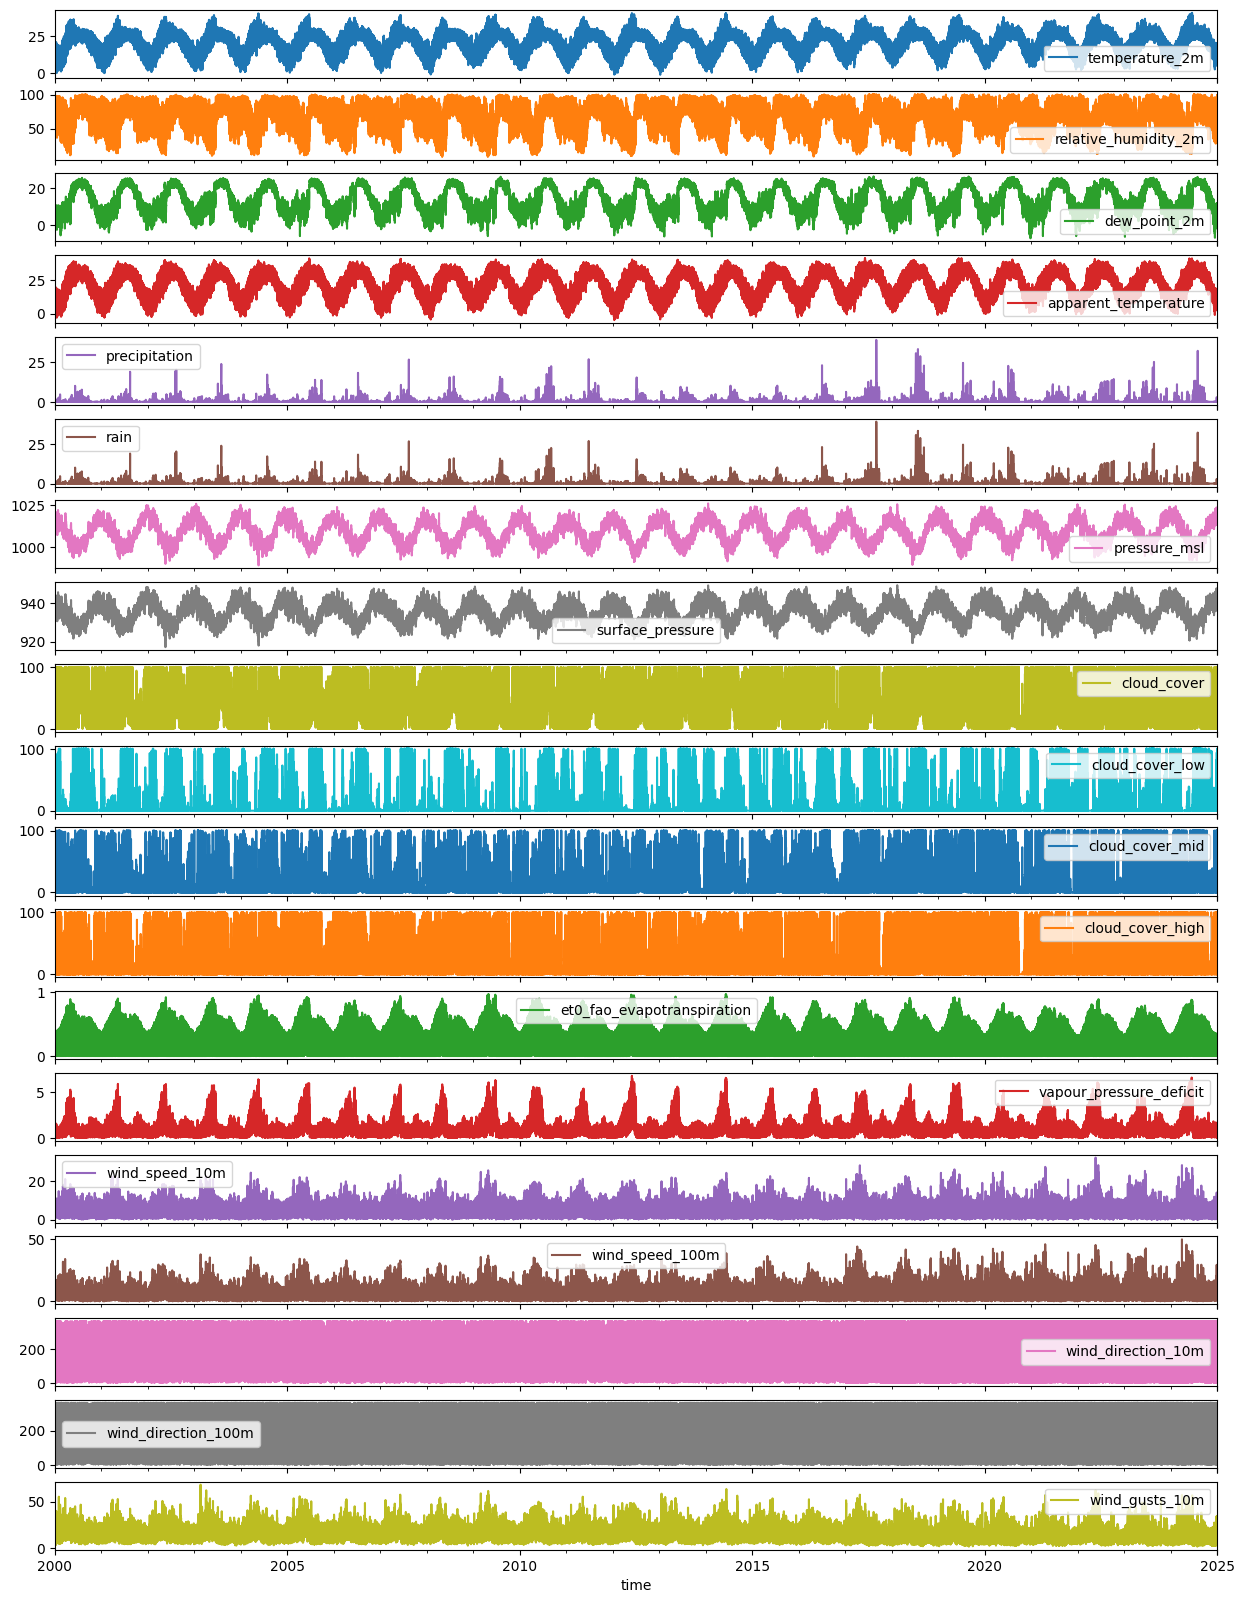

In [10]:
df_hist.set_index('time')[cols_for_series_plot].plot(subplots=True, figsize=(15, 20))
plt.show()

## 2.2 Correlation Heatmap

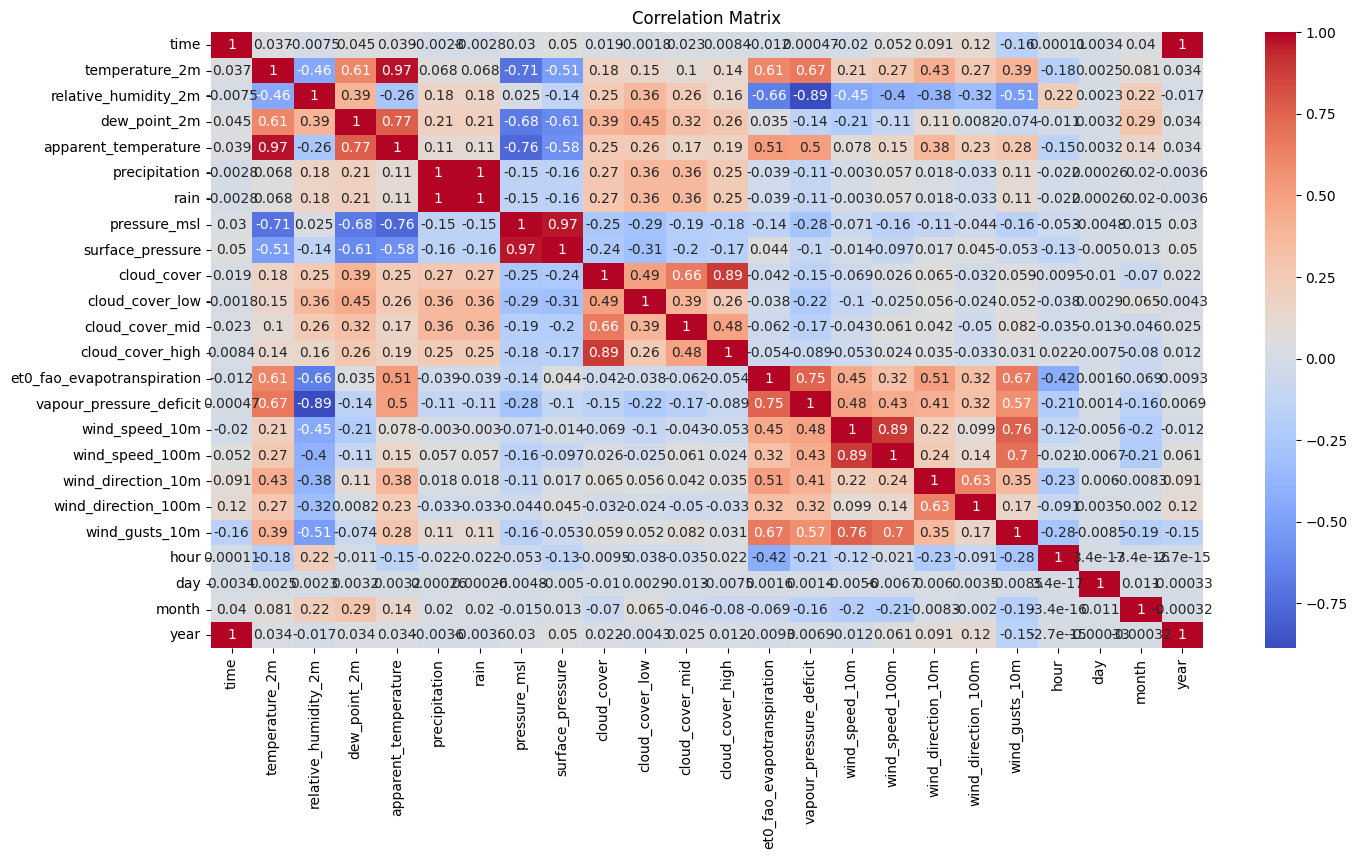

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_hist.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2.3 Distribution Plot

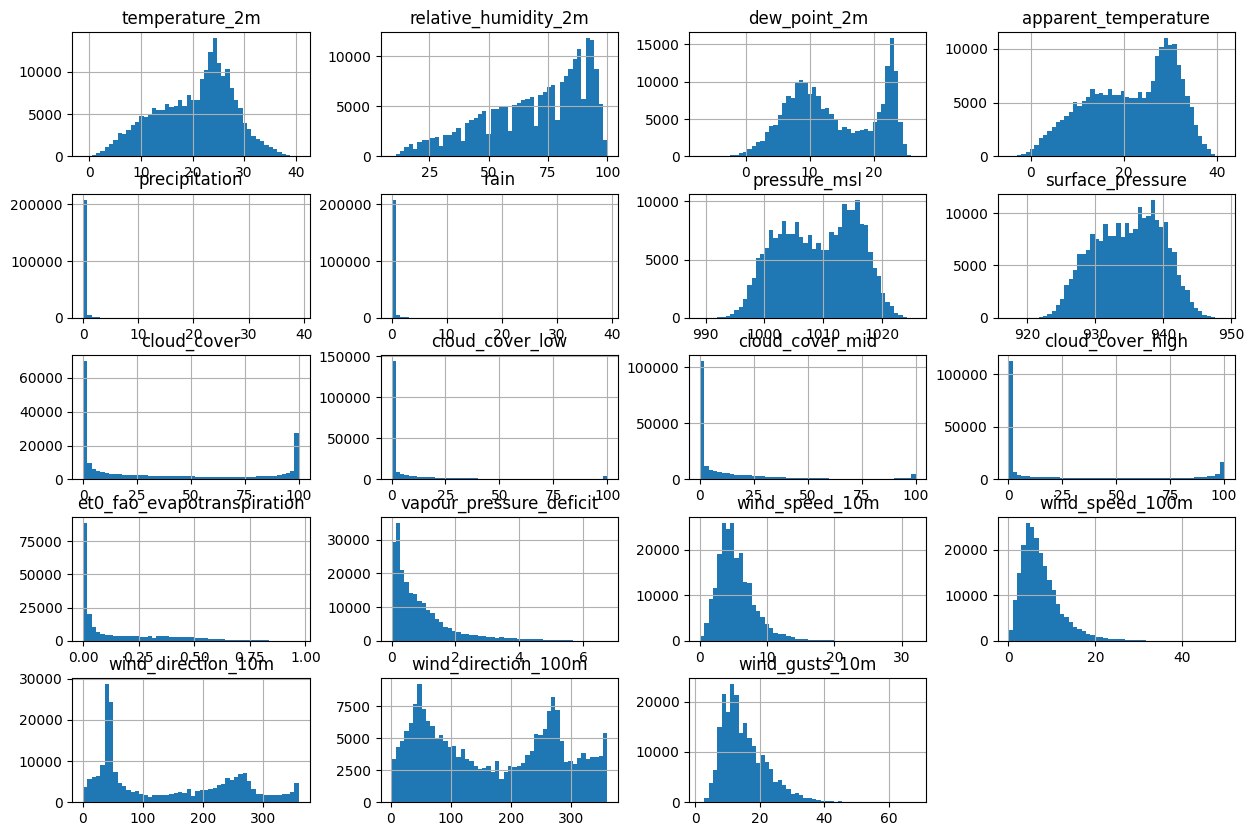

In [12]:
df_hist[cols_for_series_plot].hist(bins=50, figsize=(15, 10))
plt.show()

In [13]:
df_hist01 = df_hist.drop(['cloud_cover', 'cloud_cover_high', 'wind_direction_10m', 'wind_direction_100m'], axis='columns')
df_hist01

time  temperature_2m  relative_humidity_2m  \
0      2000-01-01 00:00:00             4.0                    96   
1      2000-01-01 01:00:00             4.1                    95   
2      2000-01-01 02:00:00             4.0                    95   
3      2000-01-01 03:00:00             6.5                    92   
4      2000-01-01 04:00:00            12.9                    75   
...                    ...             ...                   ...   
219187 2025-01-01 19:00:00             9.8                    77   
219188 2025-01-01 20:00:00            10.6                    67   
219189 2025-01-01 21:00:00            11.1                    59   
219190 2025-01-01 22:00:00            10.5                    54   
219191 2025-01-01 23:00:00             9.1                    56   

        dew_point_2m  apparent_temperature  precipitation  rain  pressure_msl  \
0                3.3                   1.9            0.0   0.0        1017.5   
1                3.3                   1.9            0.0   0.0        1017.9   
2                3.2                   1.9            0.0   0.0        1018.8   
3                5.3                   4.7            0.0   0.0        1019.4   
4                8.6                  12.2            0.0   0.0        1020.0   
...              ...                   ...            ...   ...           ...   
219187           5.8                   8.3            0.0   0.0        1016.4   
219188           4.7                   8.9            0.0   0.0        1015.4   
219189           3.3                   9.0            0.0   0.0        1014.6   
219190           1.5                   7.8            0.0   0.0        1013.9   
219191           0.7                   6.5            0.0   0.0        1013.2   

        surface_pressure  cloud_cover_low  cloud_cover_mid  \
0                  938.5                0                0   
1                  938.9                0                1   
2                  939.7                0                1   
3                  940.9                0                3   
4                  943.1                0                0   
...                  ...              ...              ...   
219187             939.0                0                0   
219188             938.3                0                0   
219189             937.7                0                0   
219190             936.9                0                0   
219191             935.8                0                0   

        et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_10m  \
0                             0.00                     0.04             3.8   
1                             0.00                     0.04             4.1   
2                             0.01                     0.04             3.8   
3                             0.02                     0.07             4.3   
4                             0.13                     0.37             2.0   
...                            ...                      ...             ...   
219187                        0.00                     0.28             3.0   
219188                        0.00                     0.43             2.8   
219189                        0.00                     0.54             3.5   
219190                        0.02                     0.59             5.8   
219191                        0.01                     0.51             3.8   

        wind_speed_100m  wind_gusts_10m  hour  day  month  year  
0                   3.6            11.5     0    1      1  2000  
1                   4.4            11.9     1    1      1  2000  
2                   4.5            11.9     2    1      1  2000  
3                   4.0            13.0     3    1      1  2000  
4                   2.5            13.0     4    1      1  2000  
...                 ...             ...   ...  ...    ...   ...  
219187              5.8             6.1    19    1      1  2025  
219188    

## 2.4 Univariate Analysis

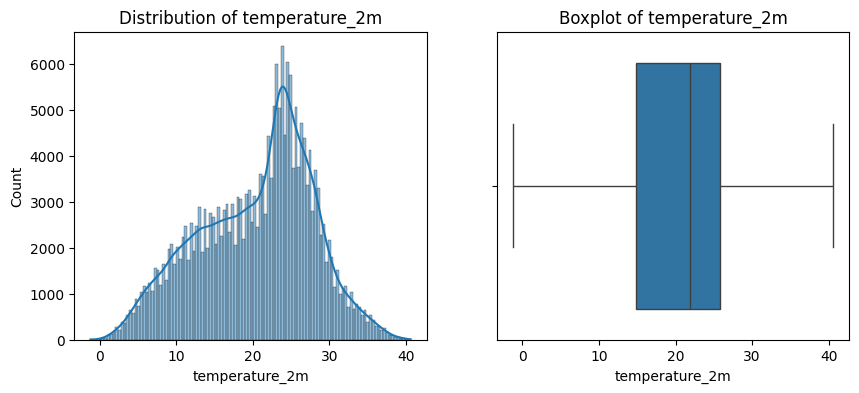

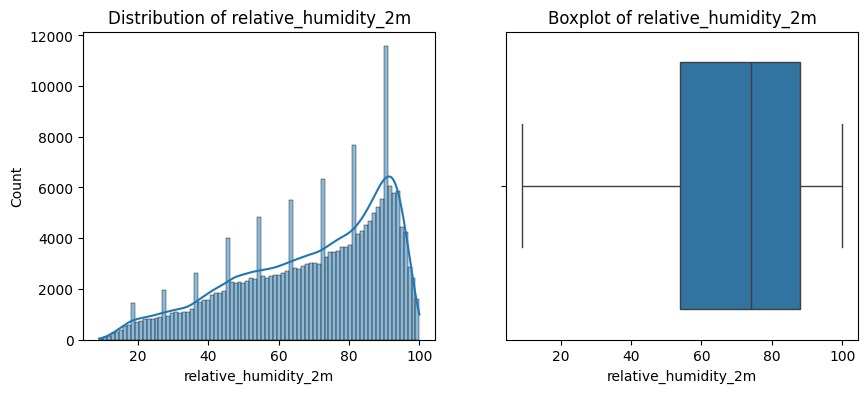

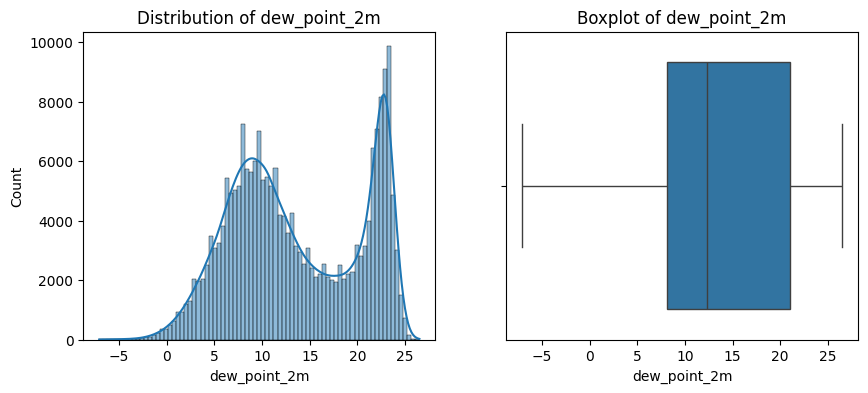

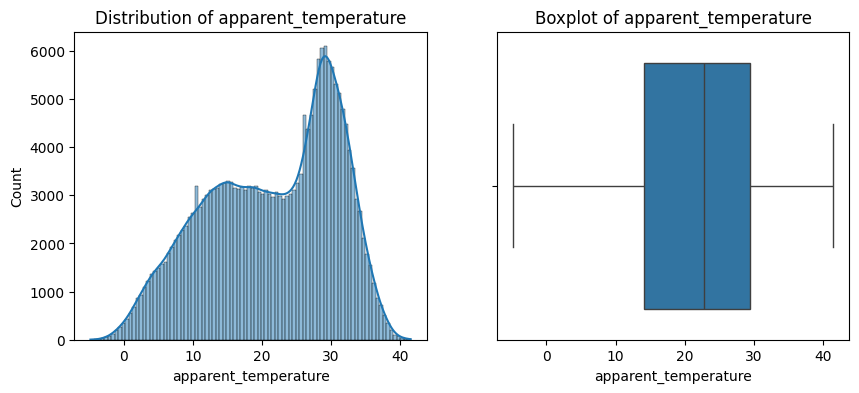

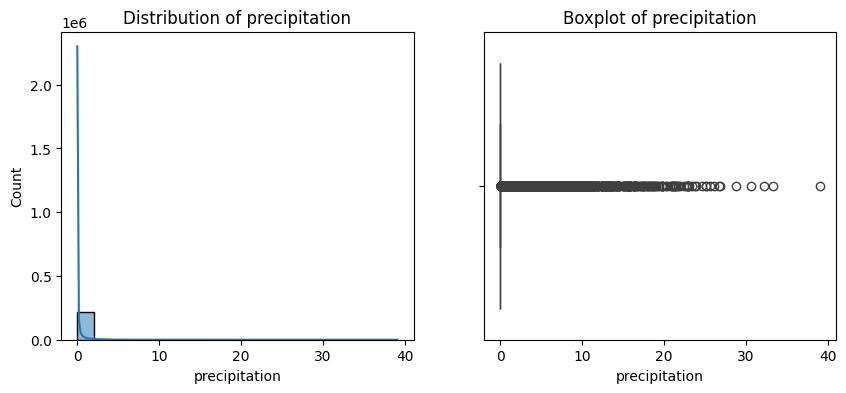

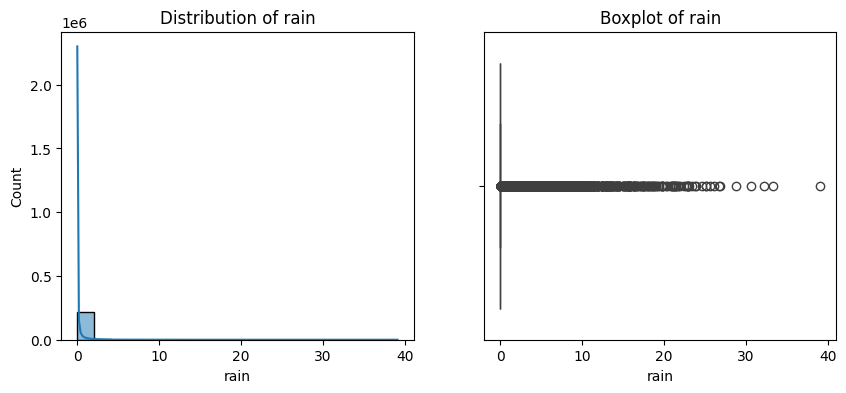

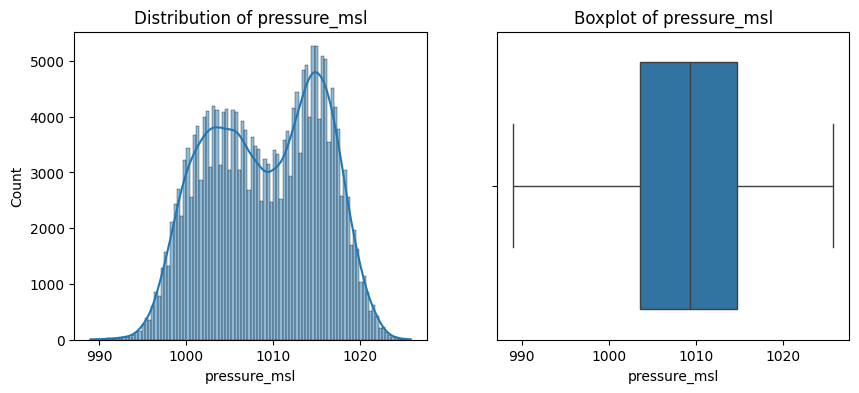

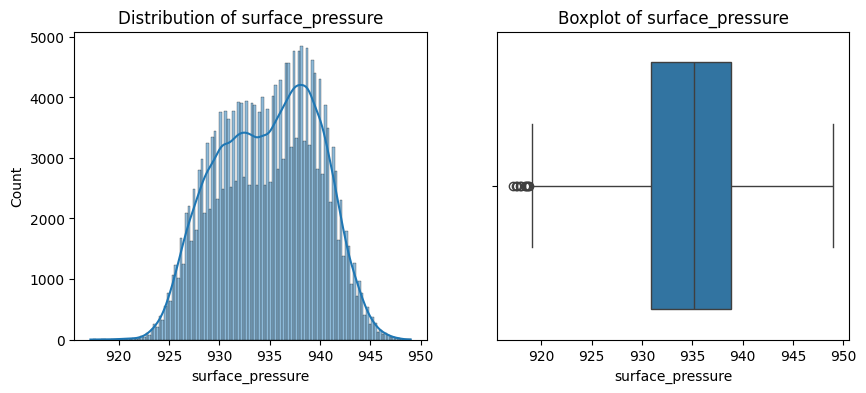

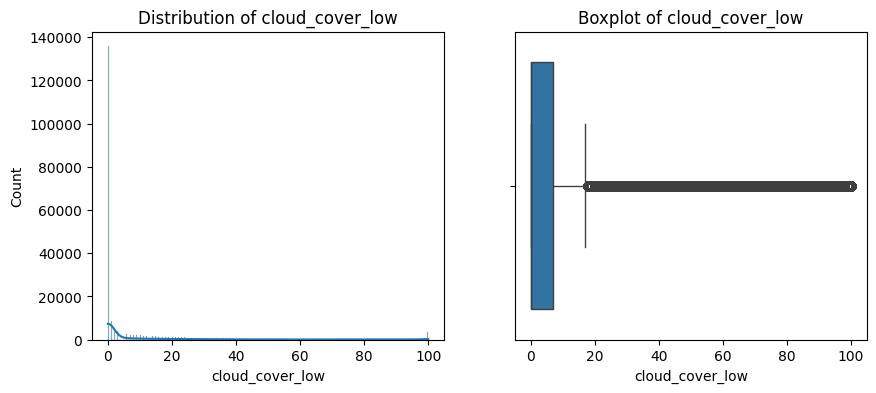

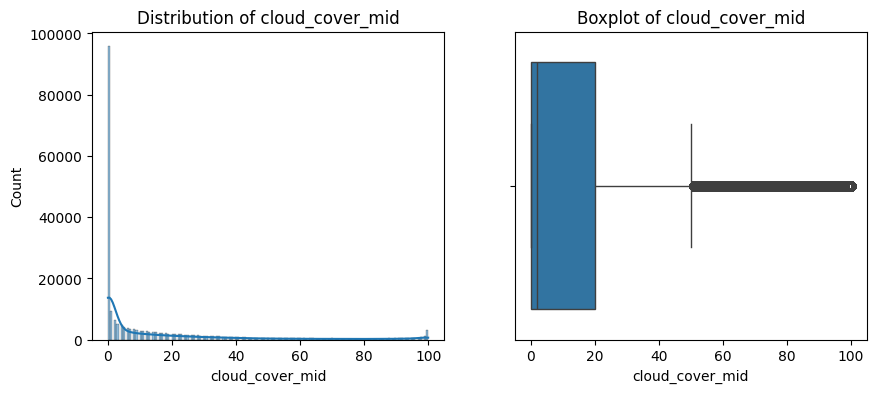

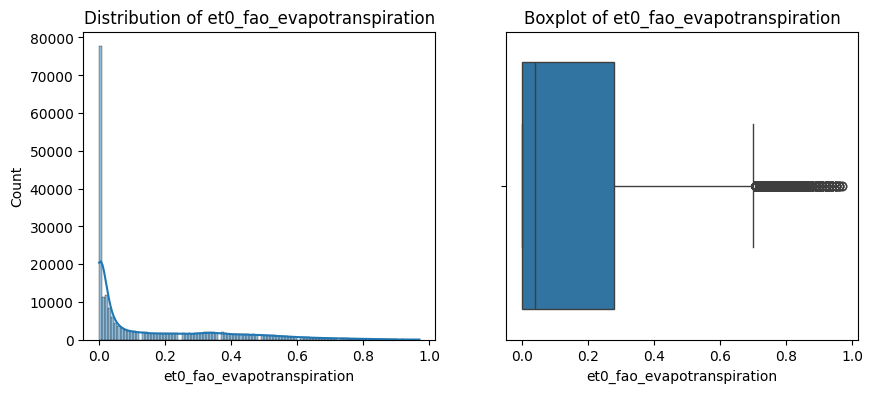

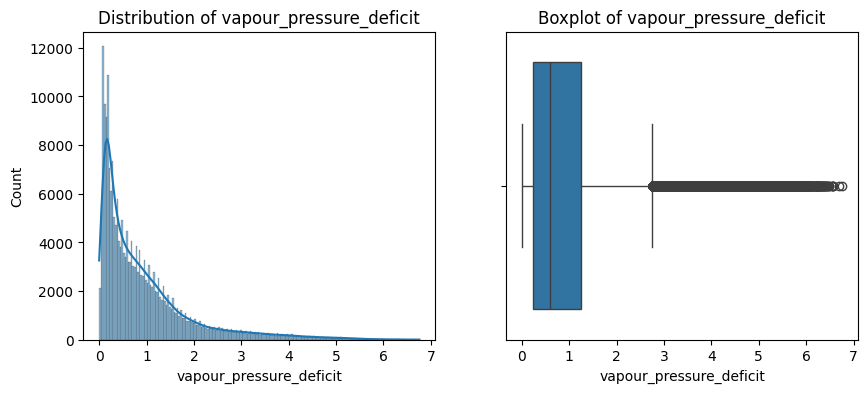

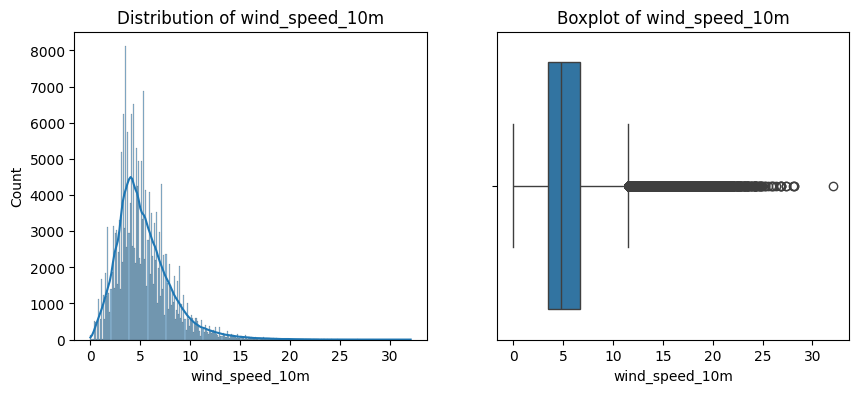

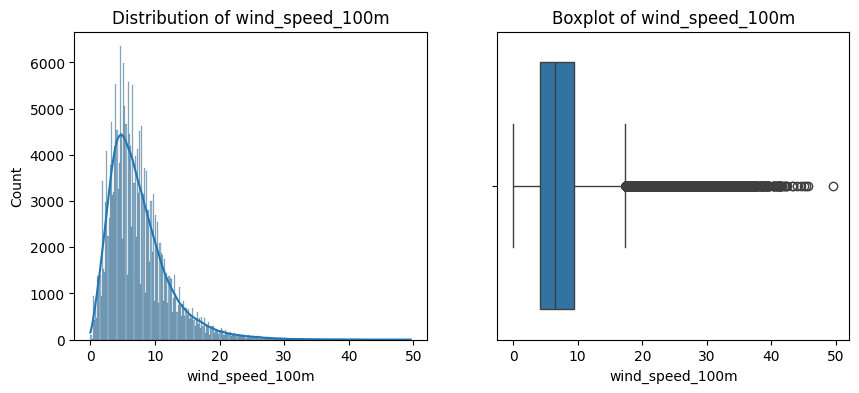

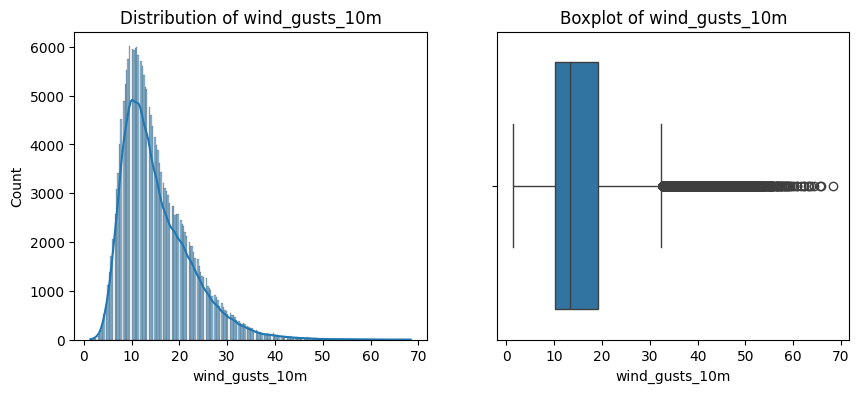

In [14]:
# Plotting histograms and boxplots
for column in df_hist01.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_hist01[column], kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_hist01[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

## 2.5 Multivariate Analysis

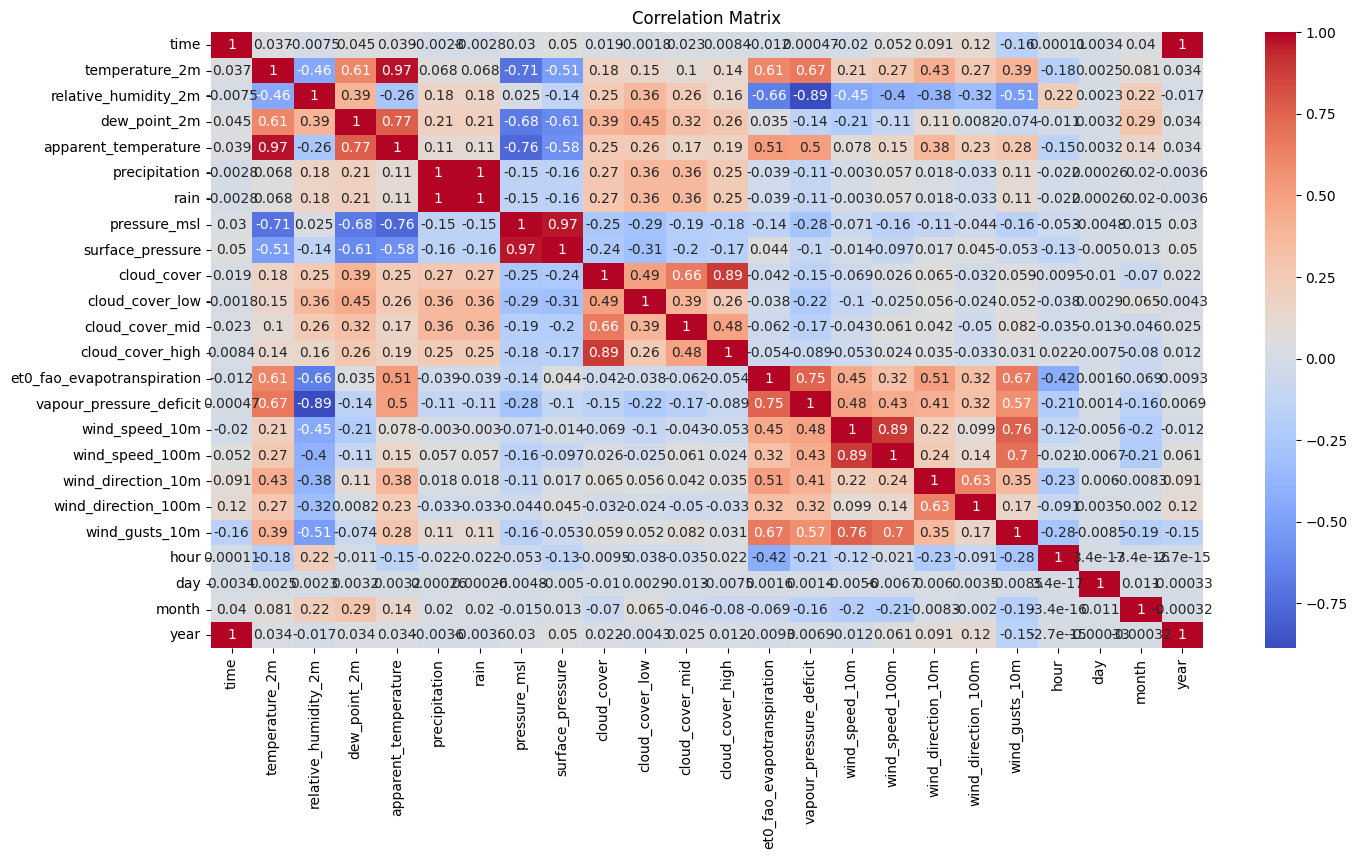

In [15]:
# Correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df_hist.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2.6 Yearly Analysis for Climate Change

In [16]:
columns_to_plot = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 
    'pressure_msl', 'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid', 'et0_fao_evapotranspiration', 
    'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m']

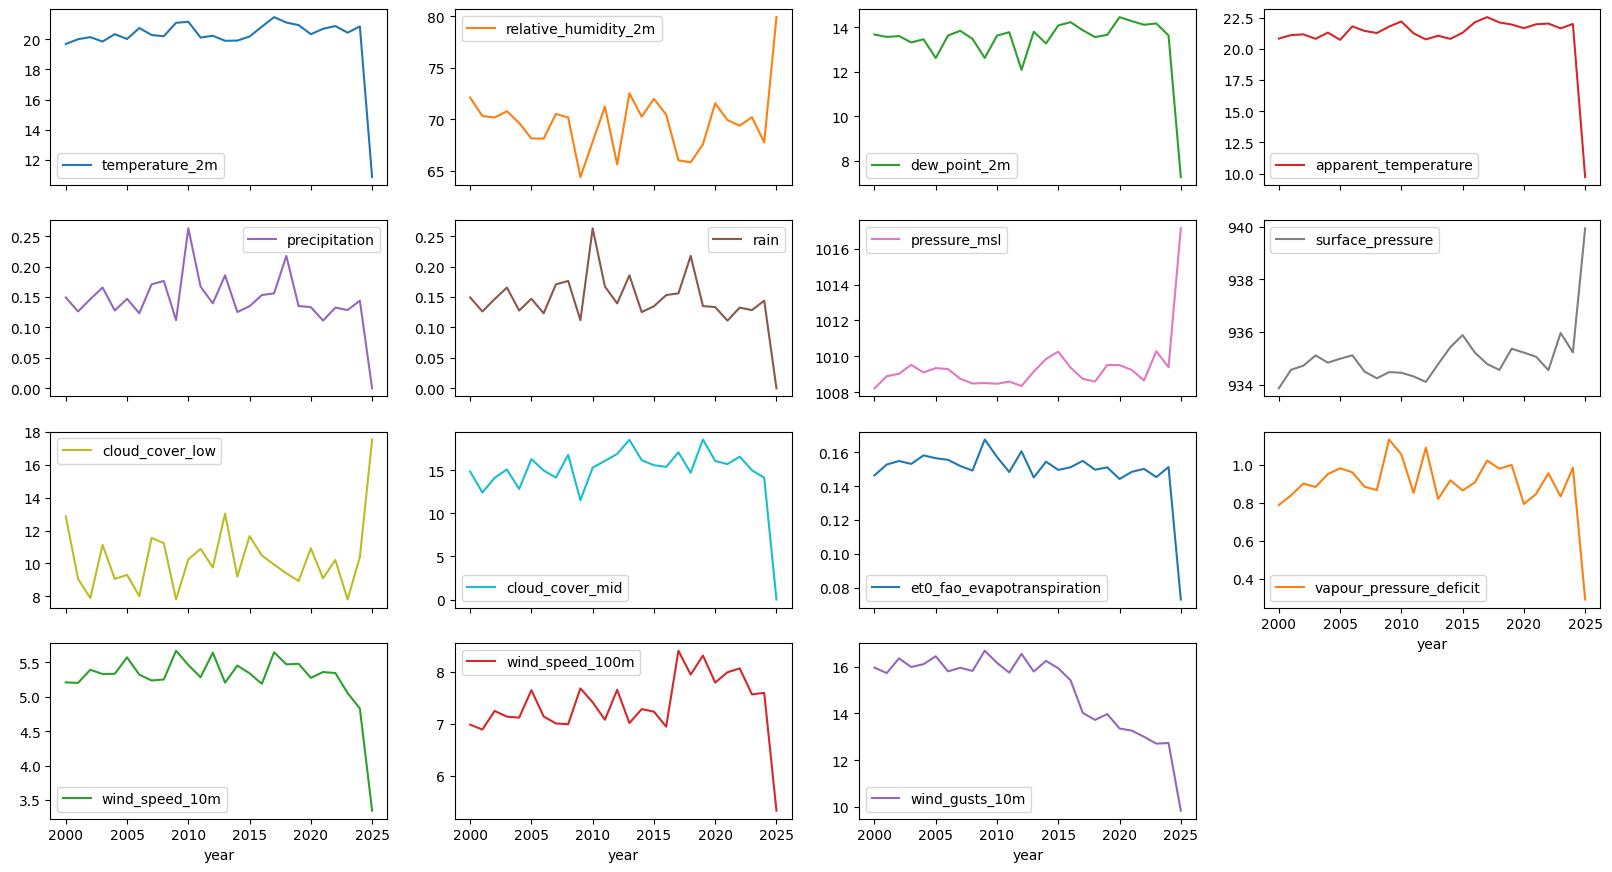

In [17]:
yearly_data = df_hist01.groupby('year').mean()

yearly_data[columns_to_plot].plot(figsize=(20, 16), subplots=True, layout=(6, 4))
plt.show()

## 2.7 Seasonality Analysis (for year 2021)

Recent Cloudburst Occurence: 12th May 2021 in Uttrakhand (reported in Chamoli and Tehri districts)

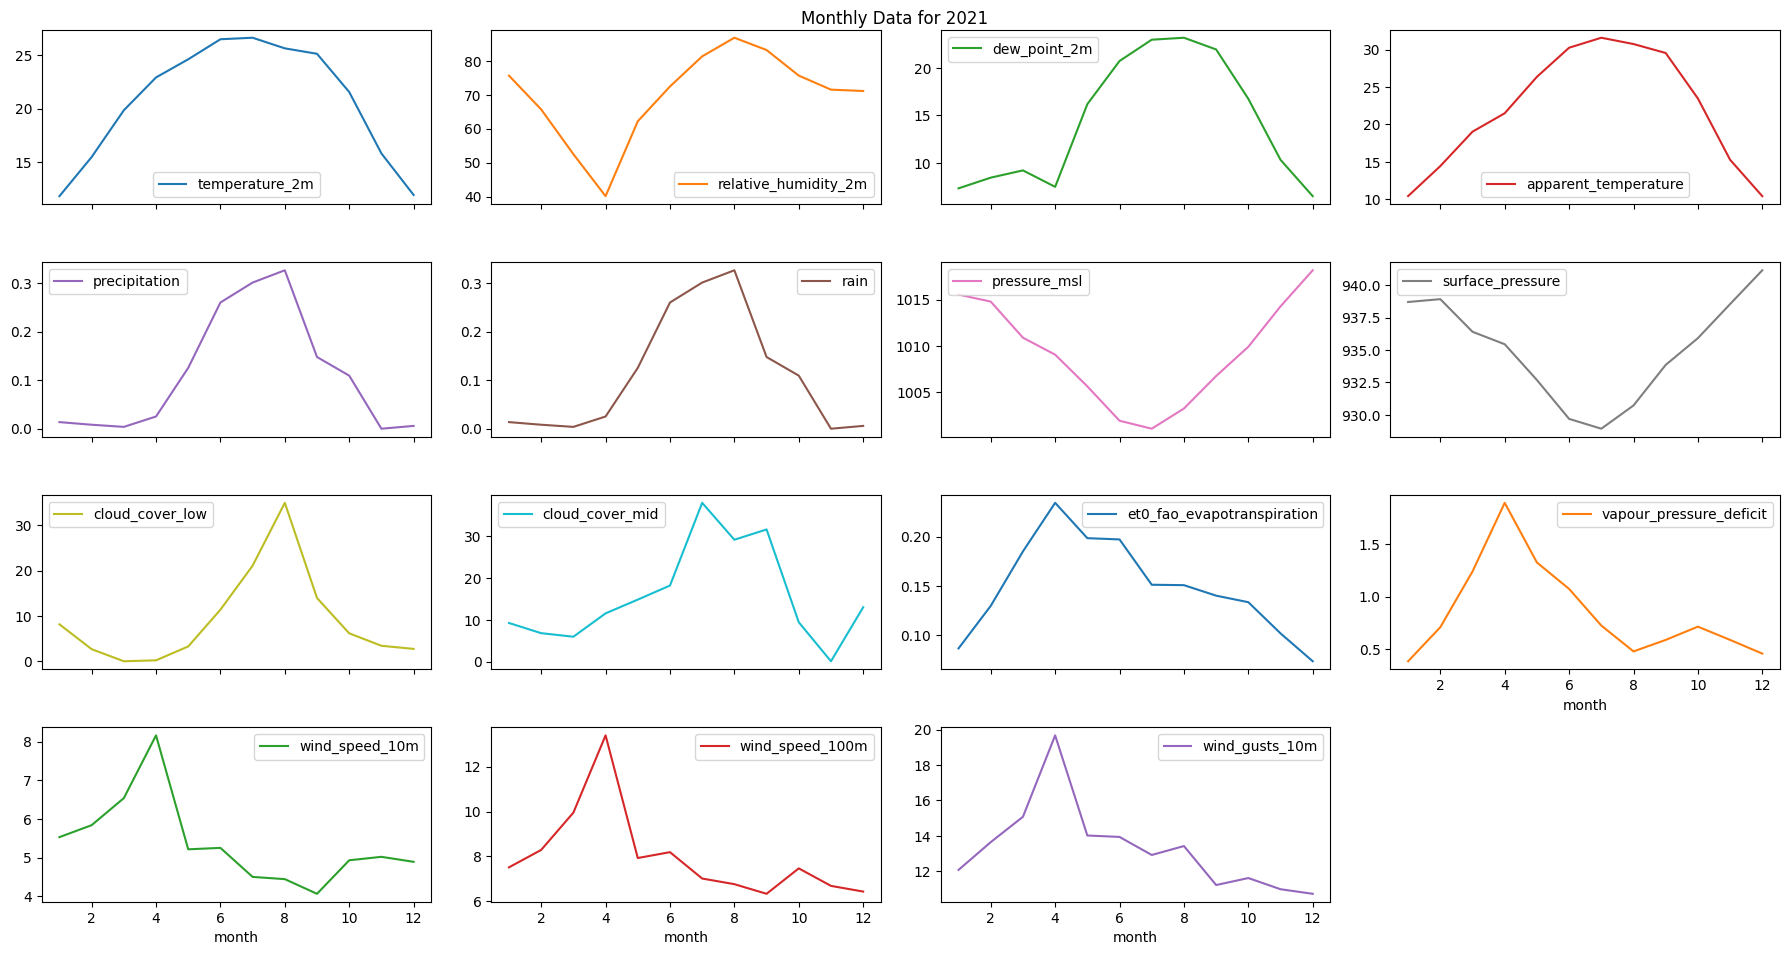

In [18]:
year = 2021
df_hist02 = df_hist01[df_hist01['year'] == year]

monthly_data = df_hist02.groupby('month').mean()

monthly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Monthly Data for {year}')
plt.tight_layout()
plt.show()

## 2.8 Zooming onto months

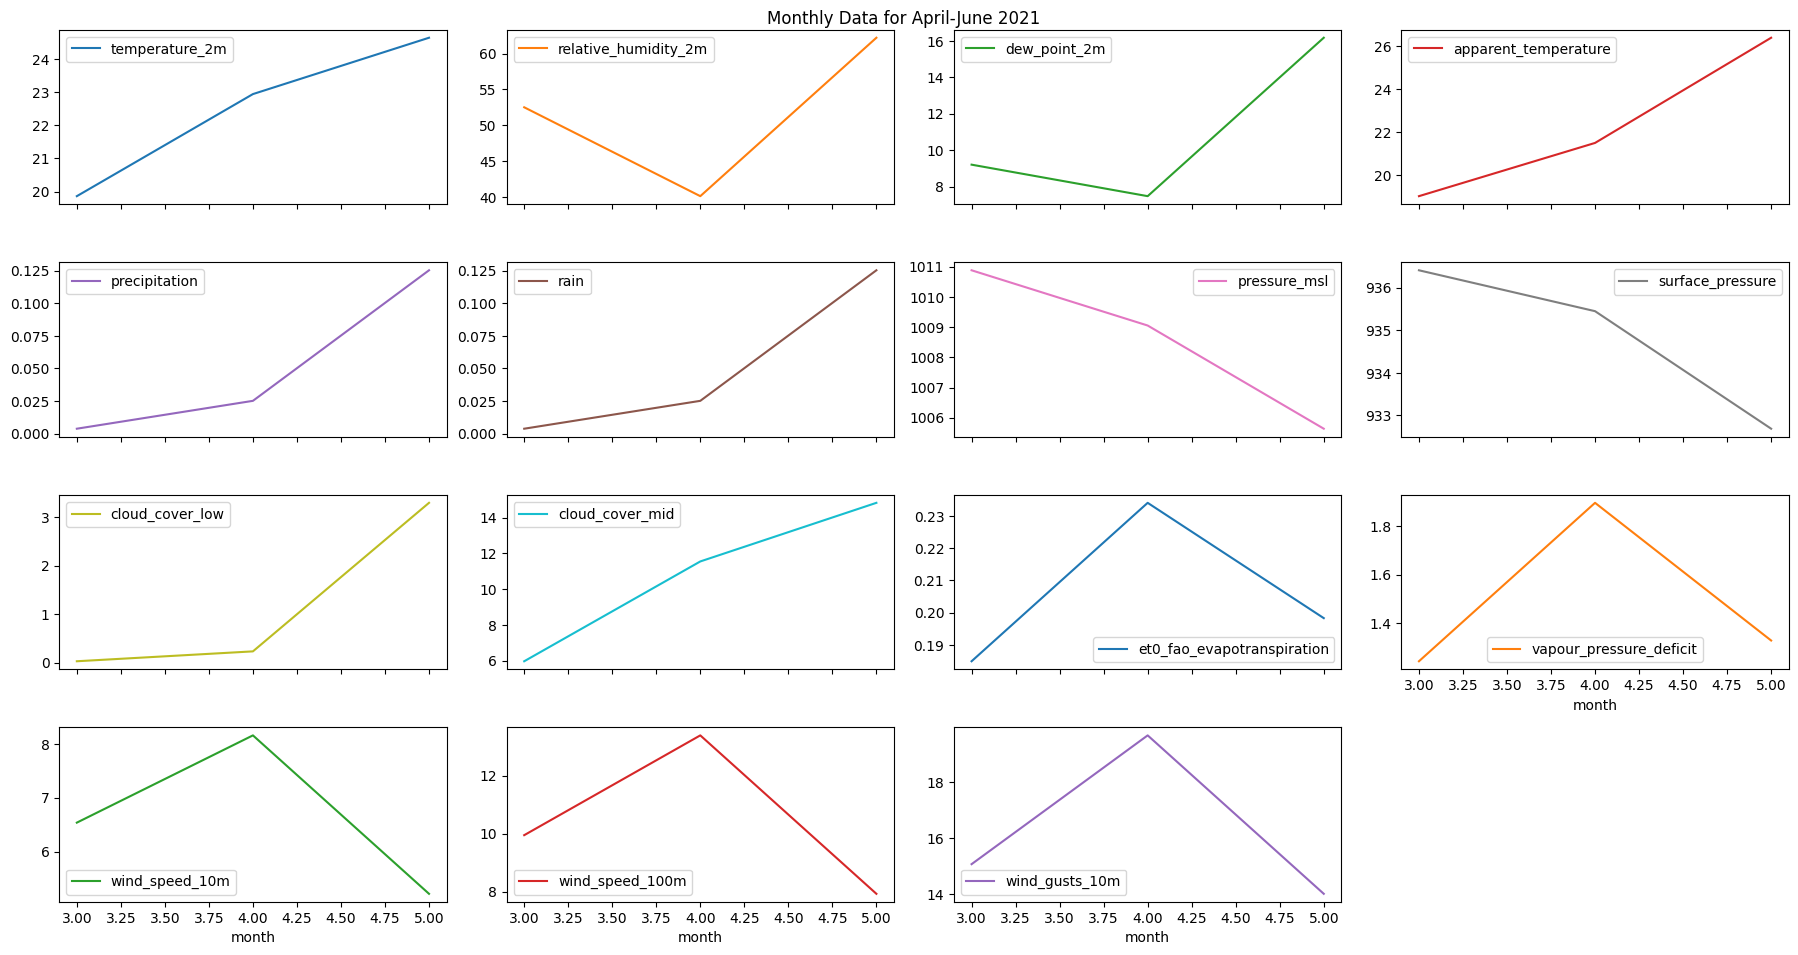

In [19]:
target_months = [3, 4, 5]
df_target_months = df_hist02[df_hist02['month'].isin(target_months)]

monthly_data = df_target_months.groupby('month').mean()

monthly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Monthly Data for April-June {year}')
plt.tight_layout()
plt.show()

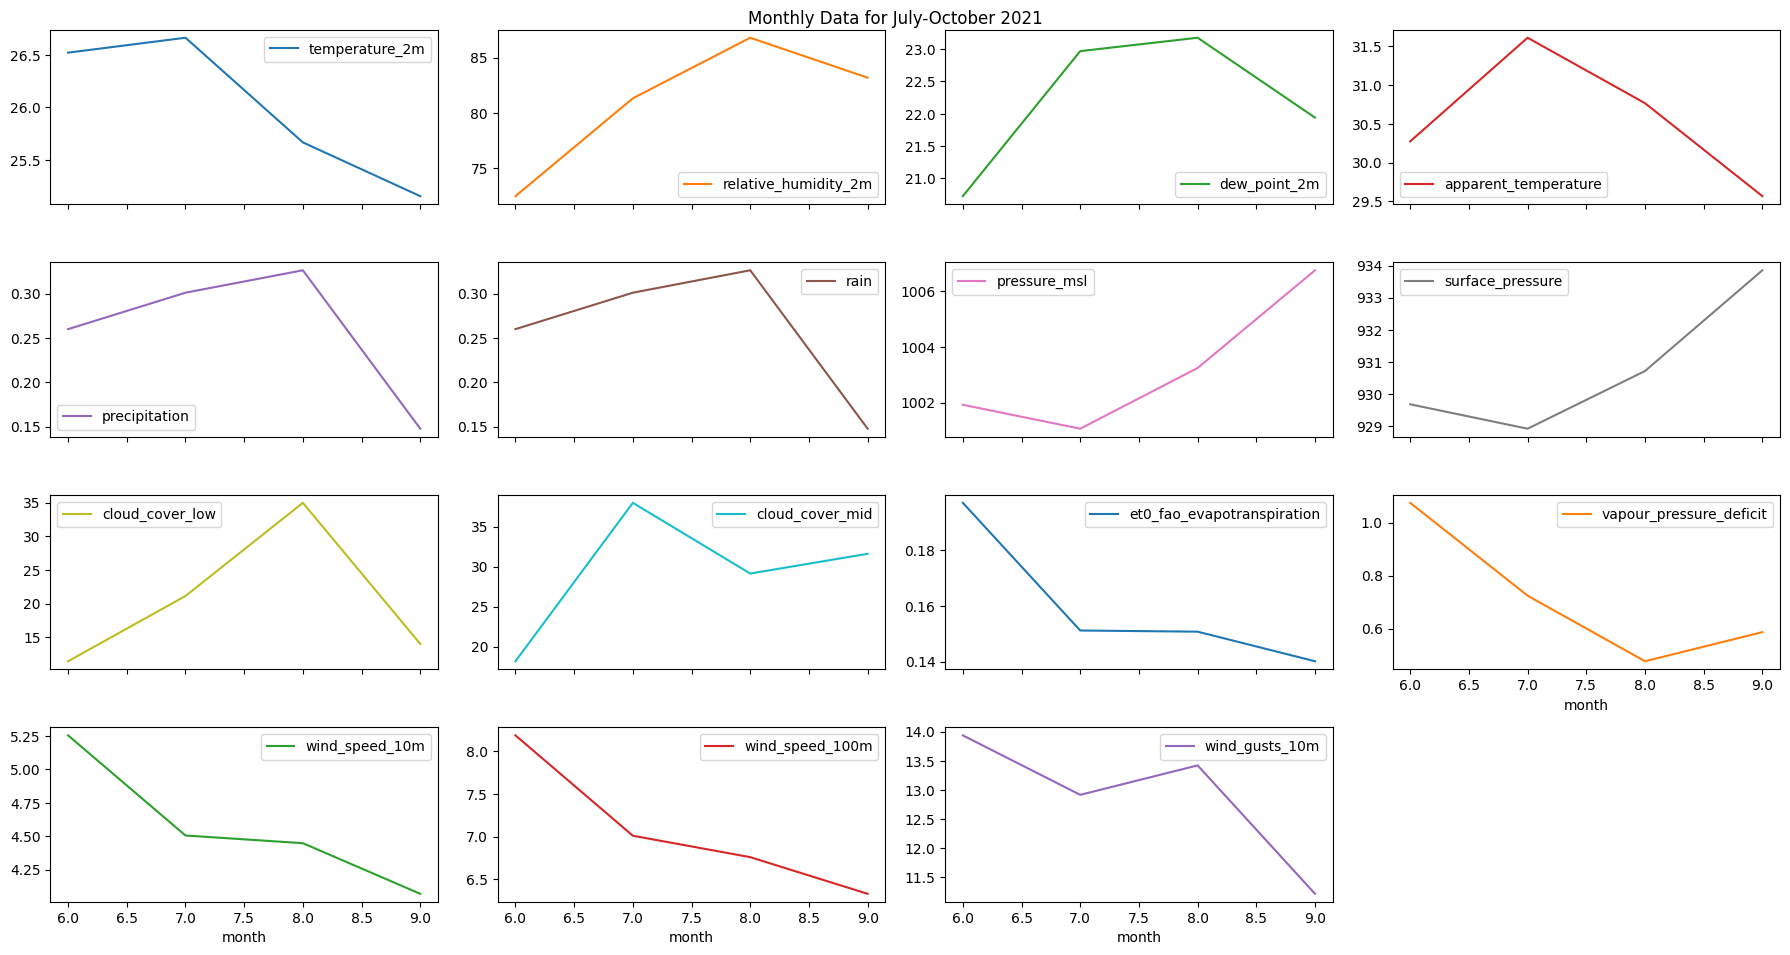

In [20]:
target_months = [6, 7, 8, 9]
df_target_months = df_hist02[df_hist02['month'].isin(target_months)]

monthly_data = df_target_months.groupby('month').mean()

monthly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Monthly Data for July-October {year}')
plt.tight_layout()
plt.show()

## 2.9 Plotting daily data for May

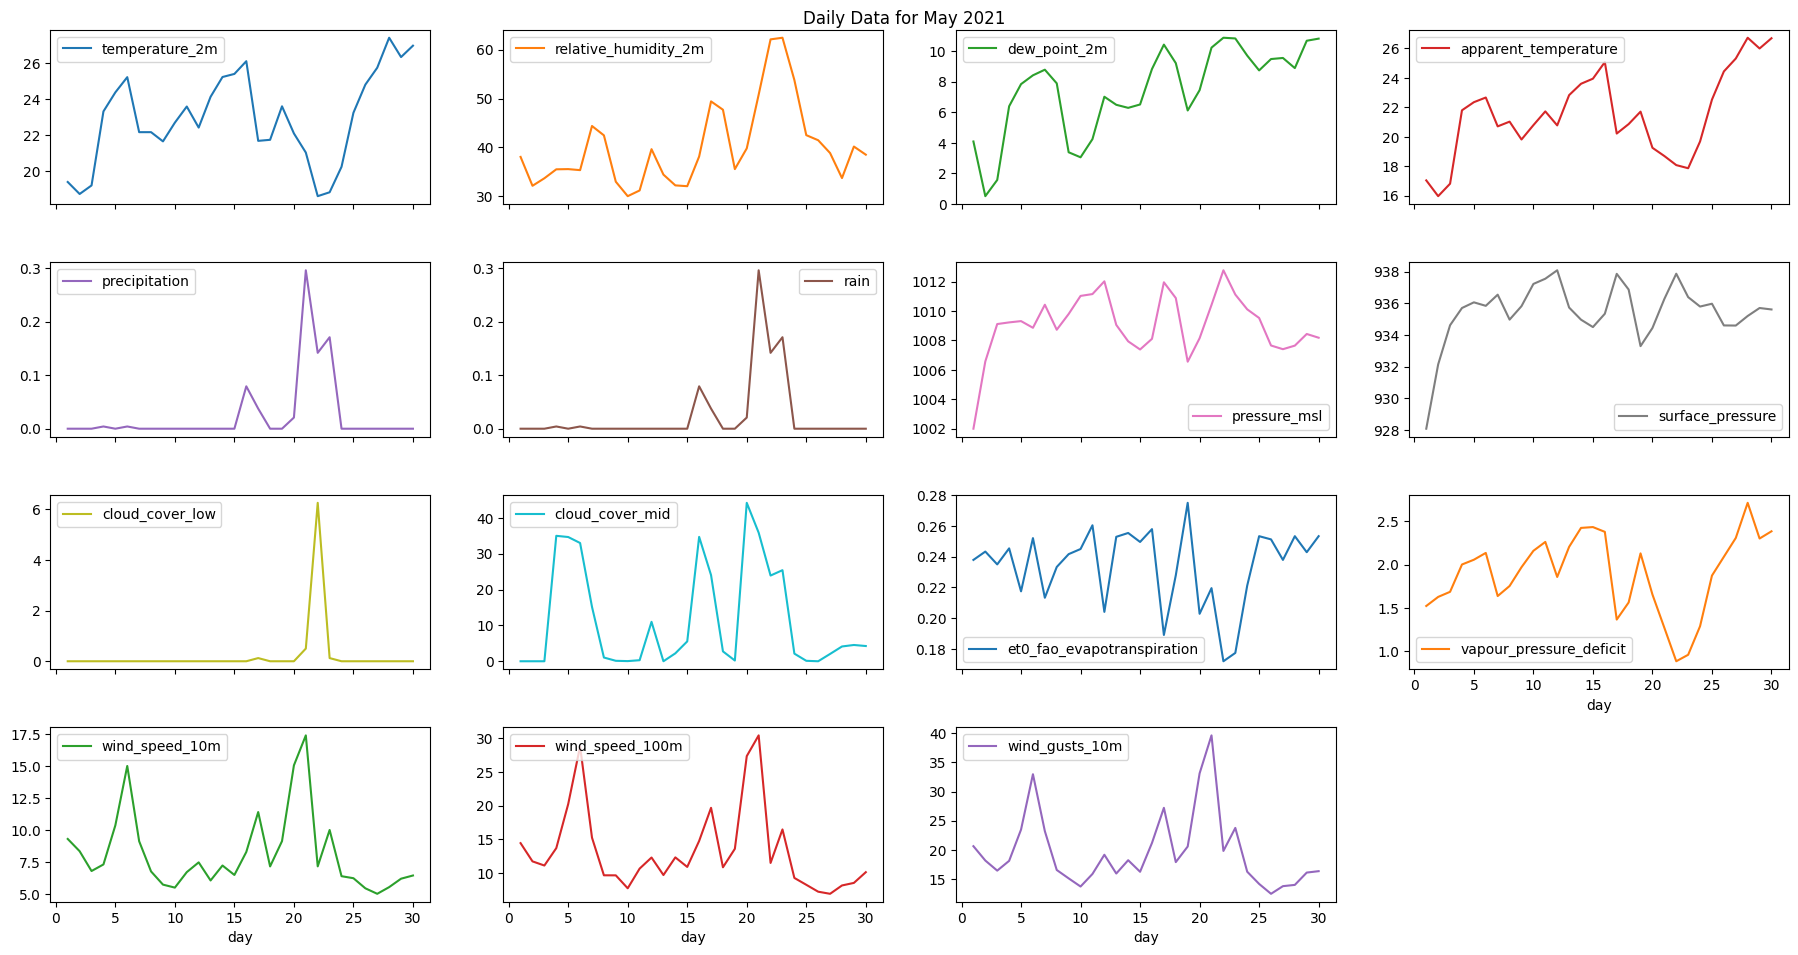

In [21]:
df_may = df_hist02[df_hist02['month'] == 4]
daily_data = df_may.groupby(df_may['day']).mean()

daily_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Daily Data for May {year}')
plt.tight_layout()
plt.show()

## 2.10 Plotting hourly data for selected dates of May

In [22]:
def plot_hourly_data(df, cols, kind='line', day_groups=None):
    """
    Function to plot hourly data for given day groups.

    Parameters:
    - df: DataFrame containing the data.
    - cols: List of columns to plot.
    - kind: Type of plot, either 'line' or 'bar'.
    - day_groups: Dictionary defining day groups with start and end days.

    Returns:
    - None: Displays the plot.
    """
    if day_groups is None:
        day_groups = {
            'day_group1': (4, 8),
            'day_group2': (8, 14),
            'day_group3': (14, 18),
            'day_group4': (18, 22)
        }

    # Loop through each group of days
    for group_name, (start_day, end_day) in day_groups.items():
        # Filter for the days in the current group
        group_data = df[(df['day'] >= start_day) & (df['day'] <= end_day)]
        
        # Group by both day and hour to get hourly data for each day in the group
        hourly_group_data = group_data.groupby(['day', 'hour']).mean()
        
        # Plotting with specified plot type
        hourly_group_data[cols].plot(
            kind=kind,  # Use 'line' or 'bar' based on input
            figsize=(18, 14), 
            subplots=True, 
            layout=(8, 4),
            title=f'Hourly Data for {group_name} (Days {start_day} to {end_day})'
        )
        plt.tight_layout()
        plt.show()

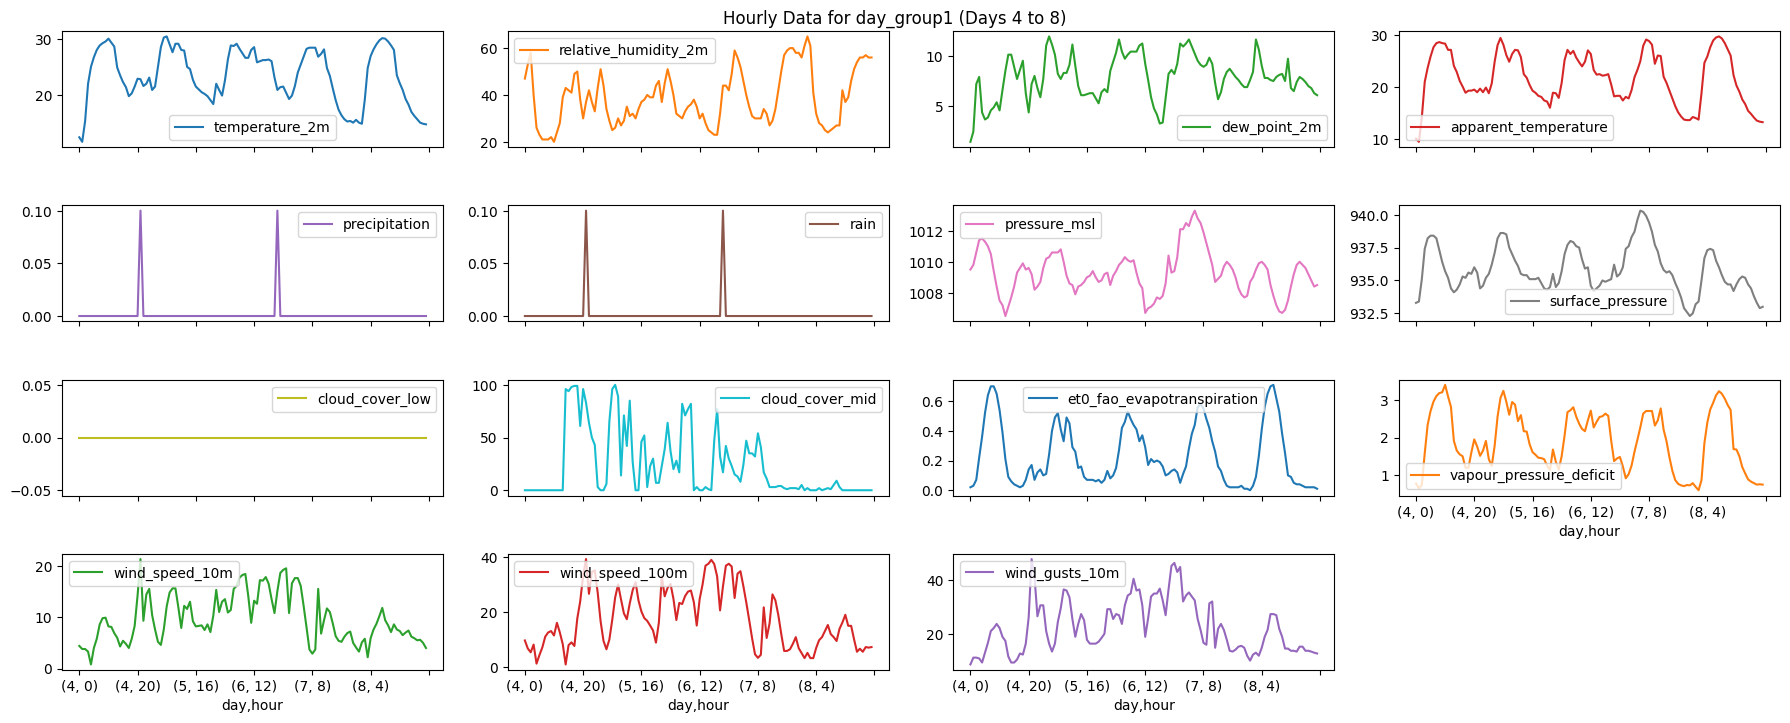

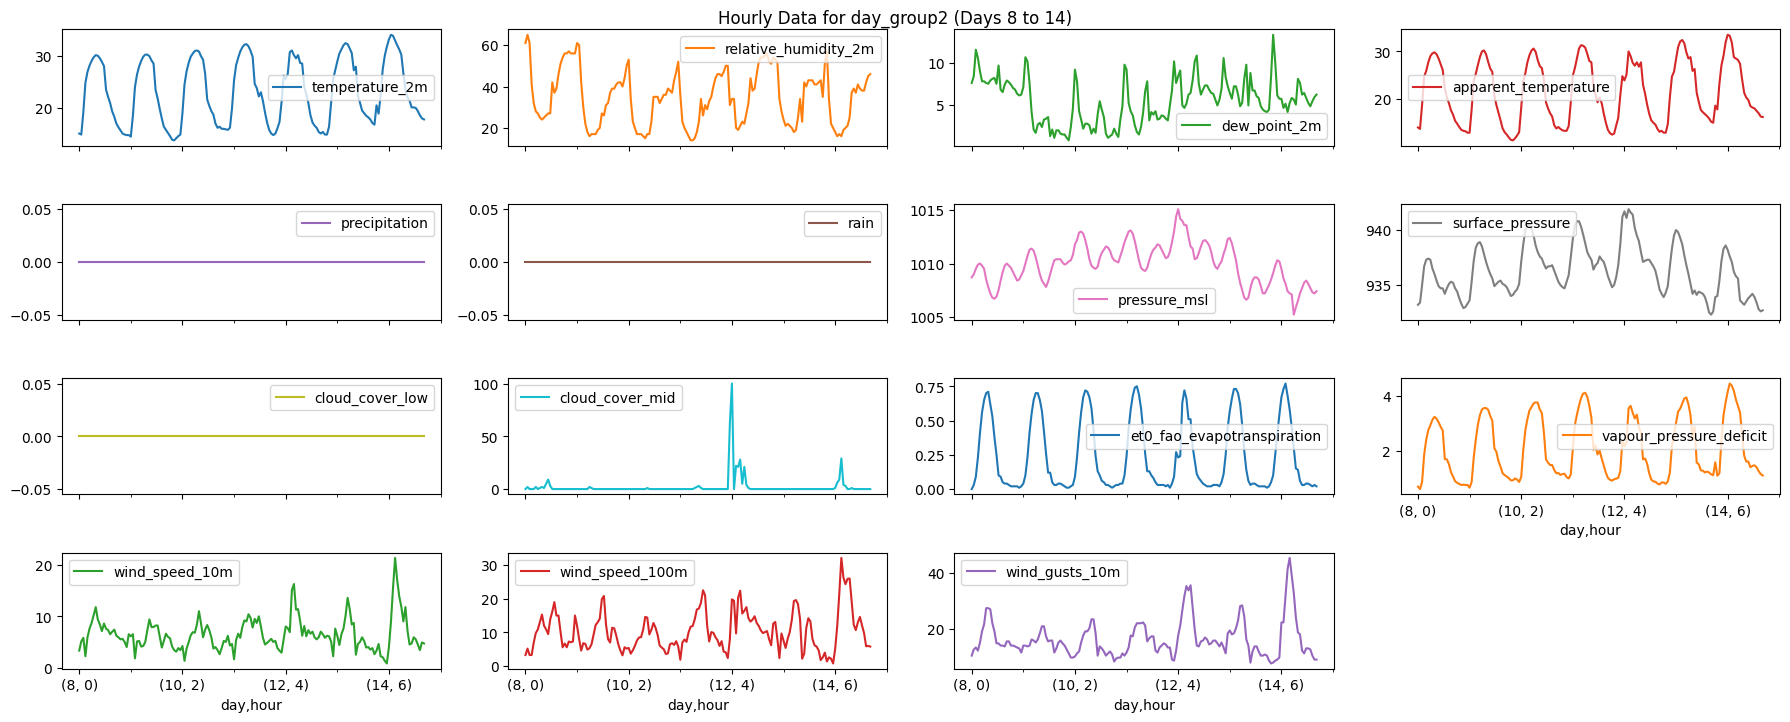

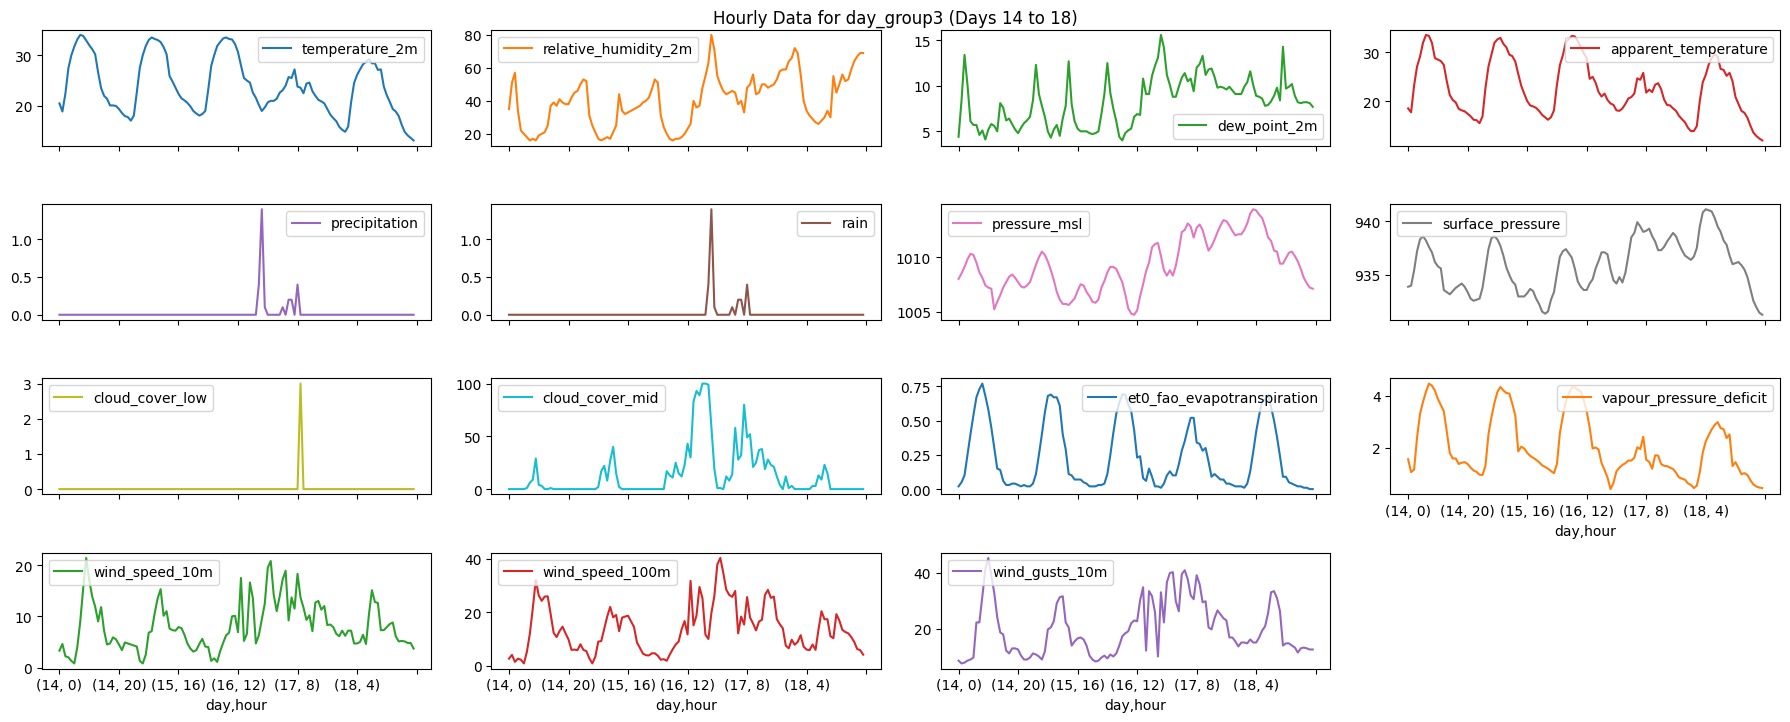

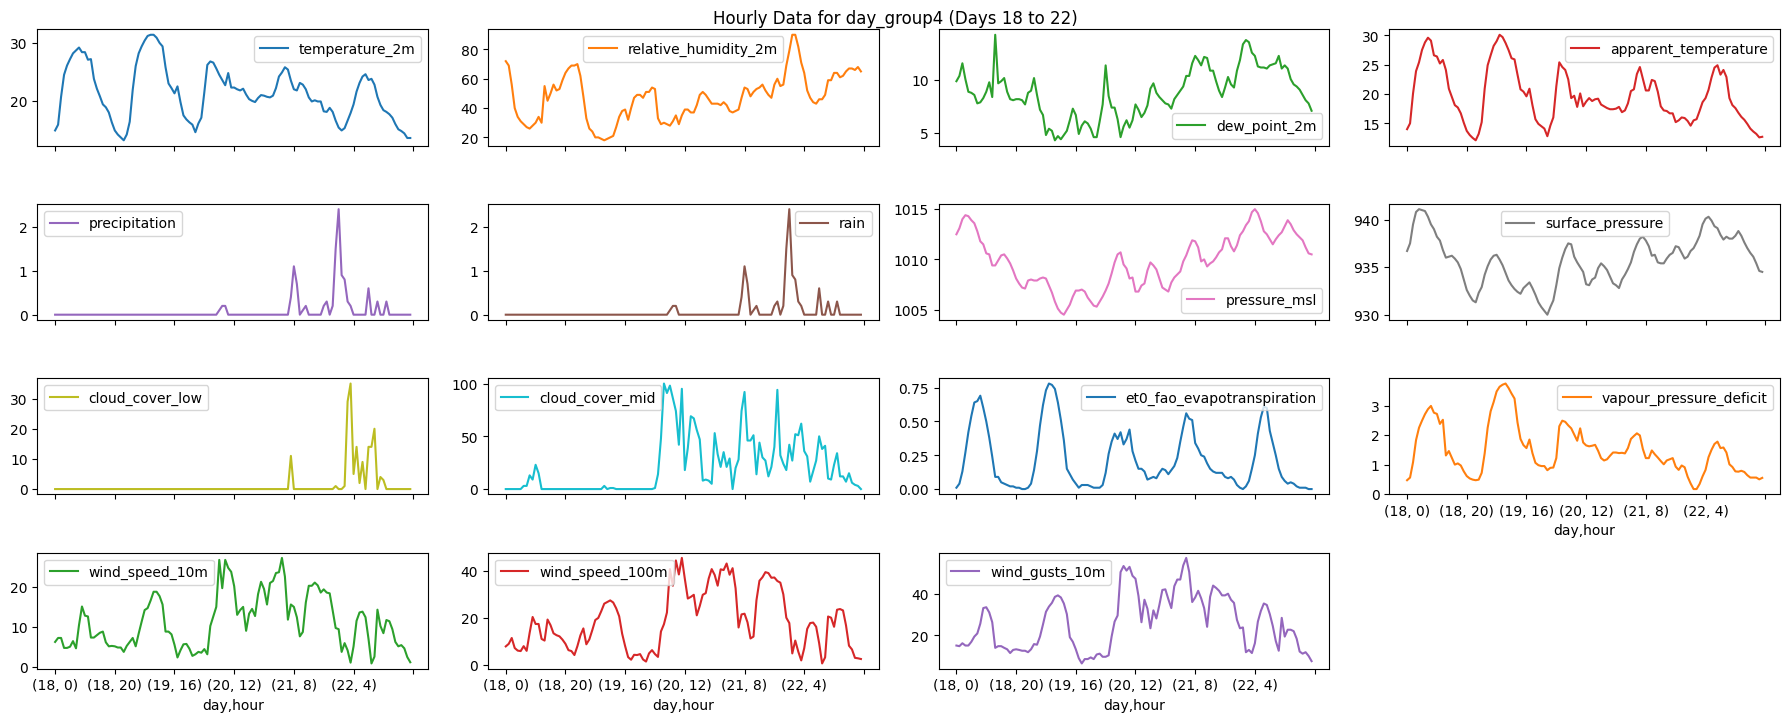

In [23]:
plot_hourly_data(df_may, cols=columns_to_plot, kind='line')

## 2.11 Narrowing down the Columns to plot: to detect & visualize the behavior

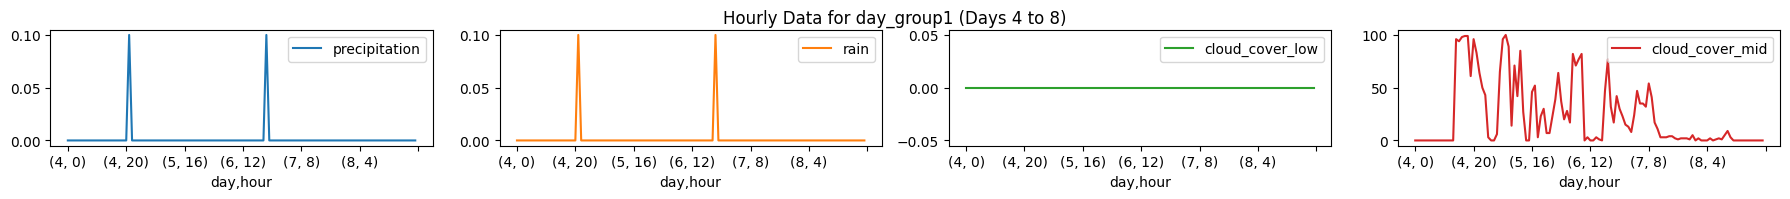

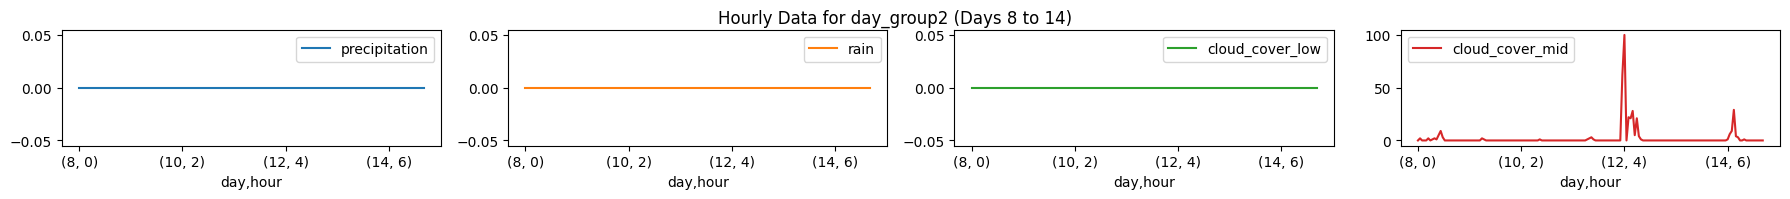

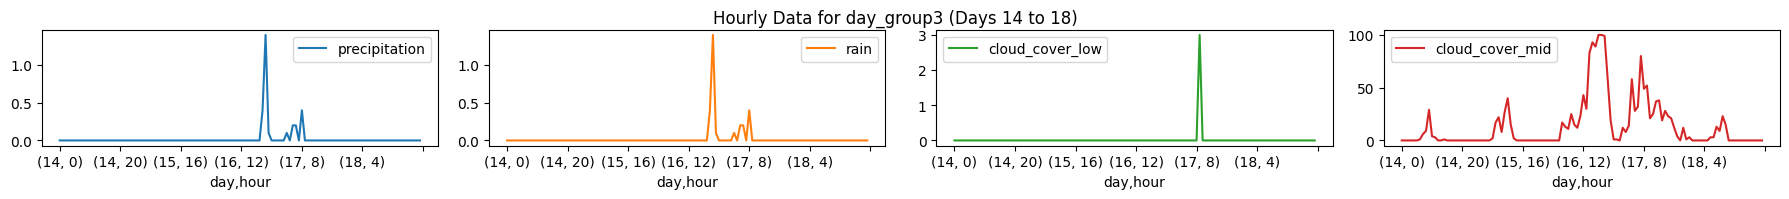

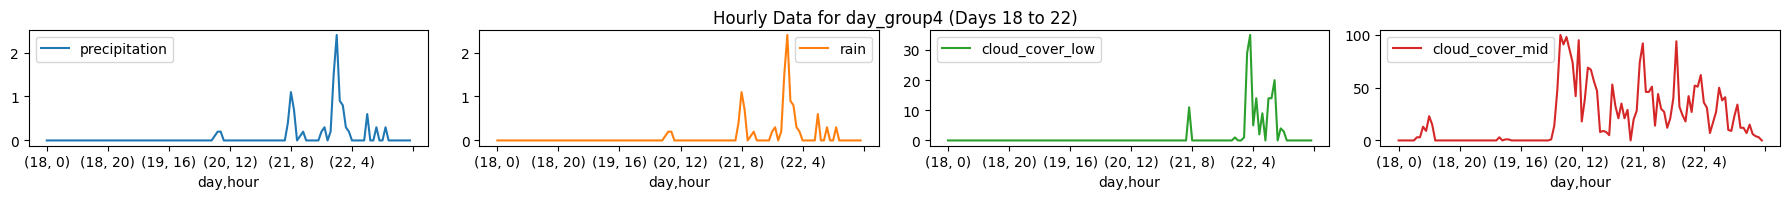

In [24]:
new_columns_to_plot = ['precipitation', 'rain', 'cloud_cover_low', 'cloud_cover_mid']

plot_hourly_data(df_may, cols=new_columns_to_plot, kind='line')

## 2.12 Plotting hourly data for specific days

In [25]:
def plot_hourly_data_for_days(df, cols, specific_days, kind='line'):
    """
    Function to plot hourly data for specific days, each in a separate plot.

    Parameters:
    - df: DataFrame containing the data.
    - cols: List of columns to plot.
    - specific_days: List of specific days to plot (e.g., [4, 5, 6]).
    - kind: Type of plot, either 'line' or 'bar'. Default is 'line'.

    Returns:
    - None: Displays the plot.
    """
    if not specific_days:
        print("No specific days provided for plotting.")
        return

    # Loop through each day in the specific days list
    for day in specific_days:
        # Filter data for the current day
        df_day = df[df['day'] == day]

        # Group by hour to get hourly data for the current day
        hourly_day_data = df_day.groupby(['hour']).mean()

        # Plotting for the current day
        hourly_day_data[cols].plot(
            kind=kind,  # Use 'line' or 'bar' based on input
            figsize=(18, 14), 
            subplots=True, 
            layout=(8, 4),
            title=f'Hourly Data for Day {day}'
        )
        plt.tight_layout()
        plt.show()

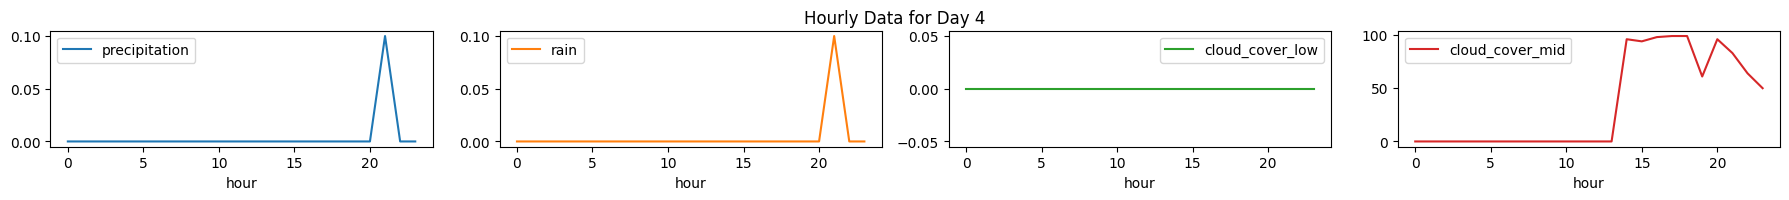

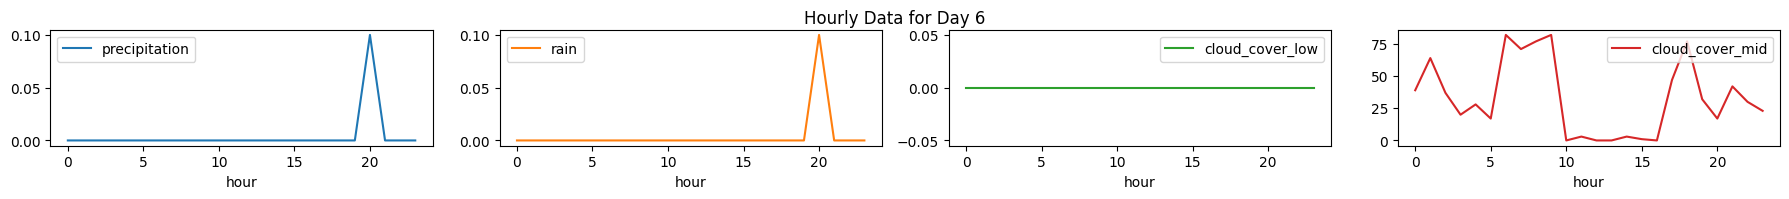

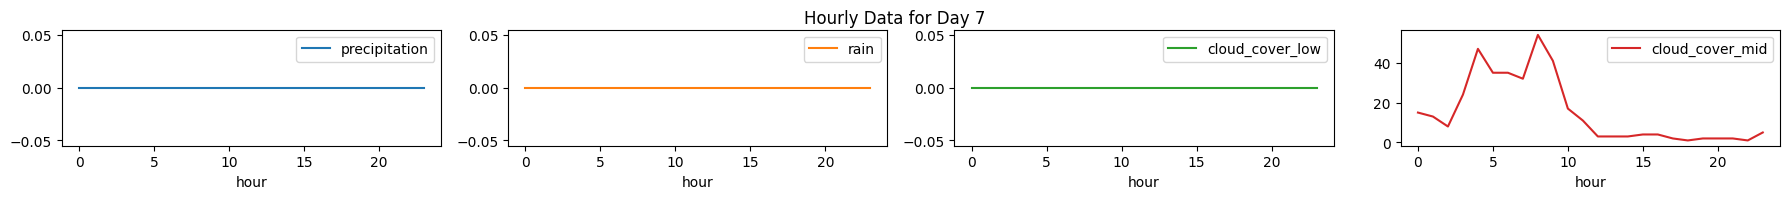

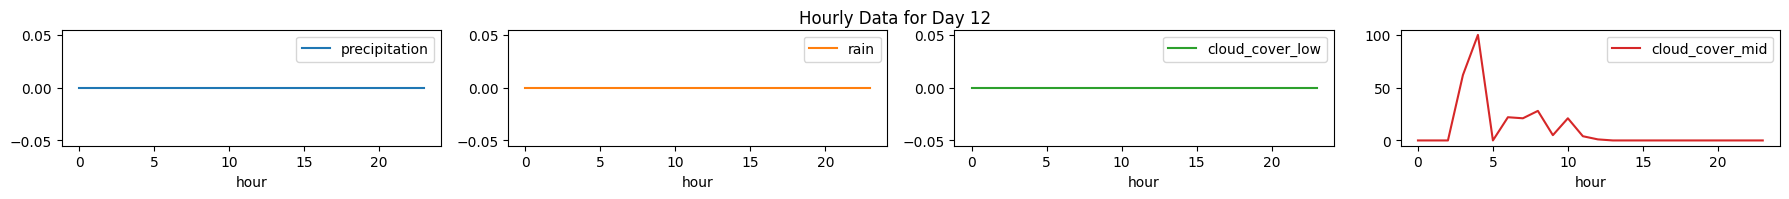

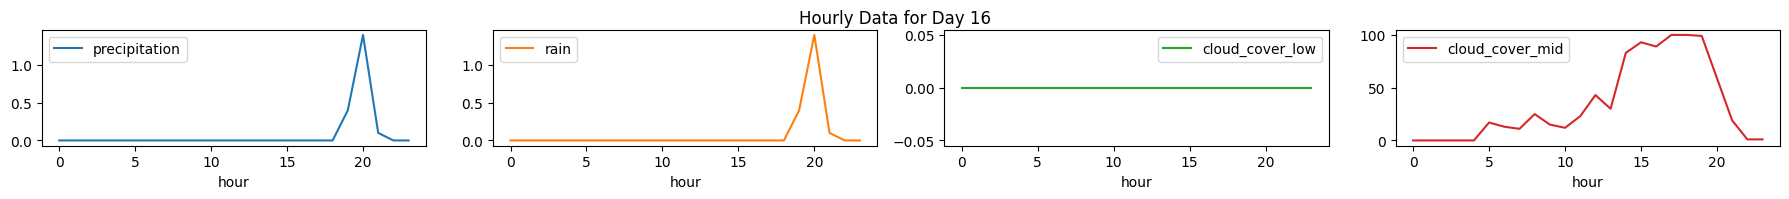

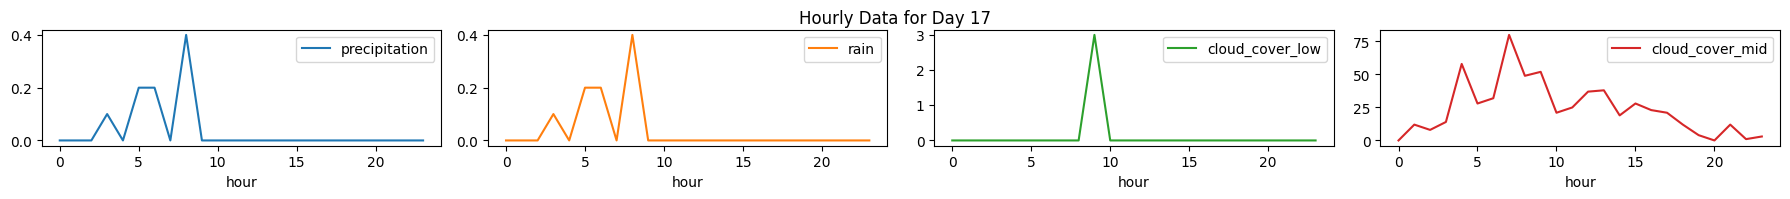

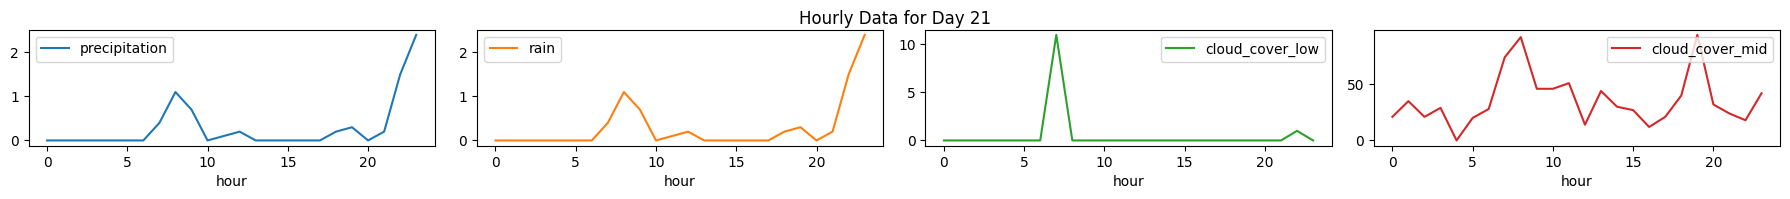

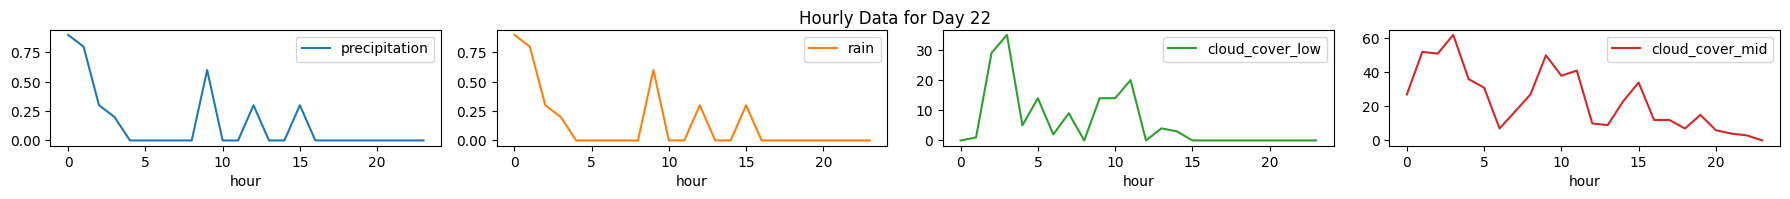

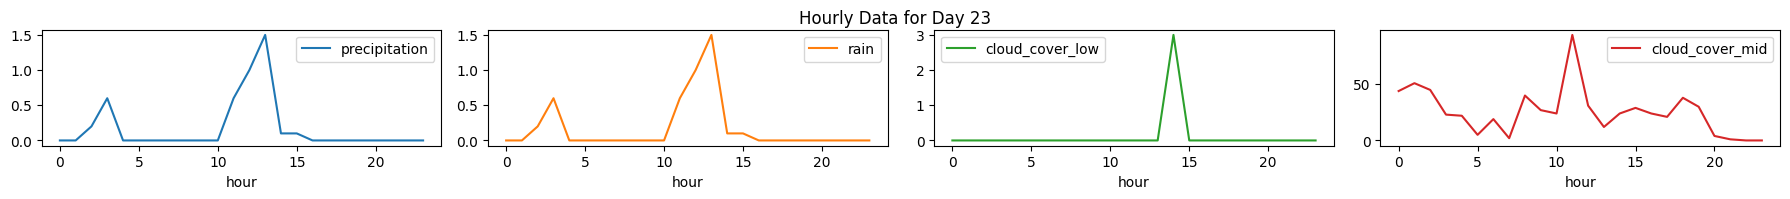

In [26]:
plot_hourly_data_for_days(df_may, cols=new_columns_to_plot, specific_days=[4, 6, 7, 12, 16, 17, 21, 22, 23], kind='line')

In [27]:
df_hist03 = df_hist01.drop(['apparent_temperature', 'precipitation', 'pressure_msl', 'surface_pressure'], axis='columns')
df_hist03.head()

time  temperature_2m  relative_humidity_2m  dew_point_2m  \
0 2000-01-01 00:00:00             4.0                    96           3.3   
1 2000-01-01 01:00:00             4.1                    95           3.3   
2 2000-01-01 02:00:00             4.0                    95           3.2   
3 2000-01-01 03:00:00             6.5                    92           5.3   
4 2000-01-01 04:00:00            12.9                    75           8.6   

   rain  cloud_cover_low  cloud_cover_mid  et0_fao_evapotranspiration  \
0   0.0                0                0                        0.00   
1   0.0                0                1                        0.00   
2   0.0                0                1                        0.01   
3   0.0                0                3                        0.02   
4   0.0                0                0                        0.13   

   vapour_pressure_deficit  wind_speed_10m  wind_speed_100m  wind_gusts_10m  \
0                     0.04             3.8              3.6            11.5   
1                     0.04             4.1              4.4            11.9   
2                     0.04             3.8              4.5            11.9   
3                     0.07             4.3              4.0            13.0   
4                     0.37             2.0              2.5            13.0   

   hour  day  month  year  
0     0    1      1  2000  
1     1    1      1  2000  
2     2    1      1  2000  
3     3    1      1  2000  
4     4    1      1  2000

## 2.13 Seasonal Decompose for Rain

<Axes: title={'center': 'Rain over Time'}, xlabel='time'>

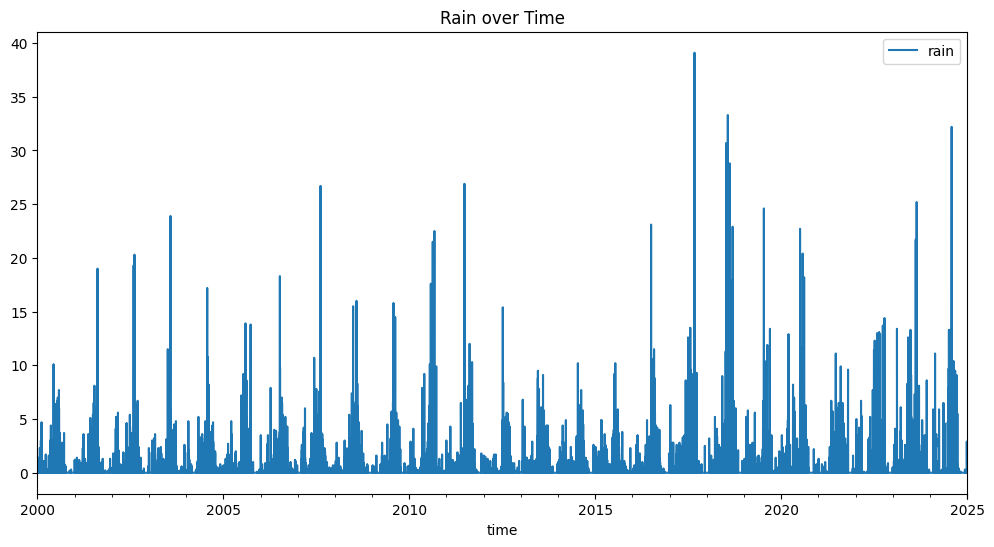

In [28]:
df_hist03.plot(x='time', y='rain', figsize=(12, 6), title='Rain over Time')

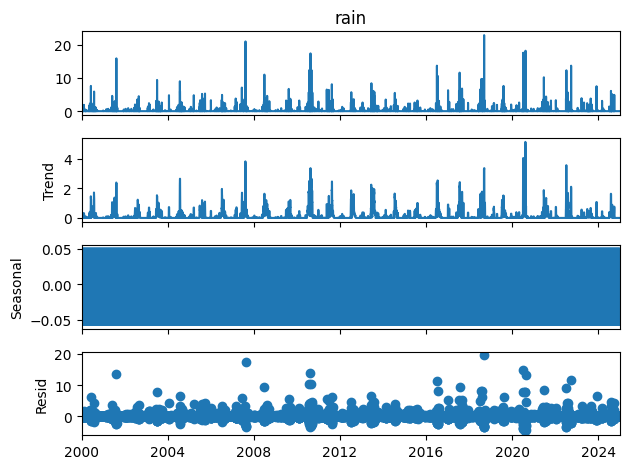

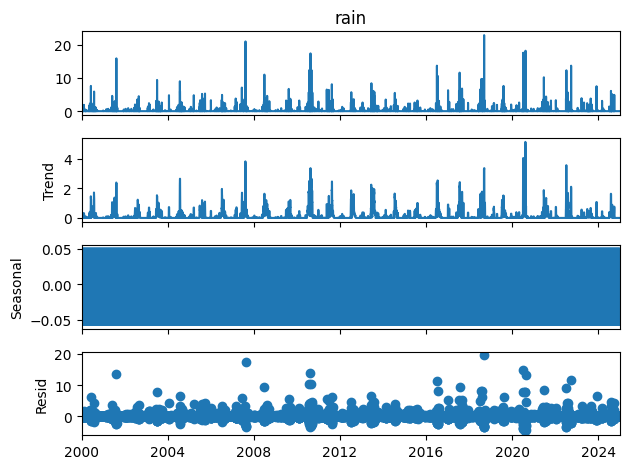

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_hist04 = df_hist03.copy()
df_hist04['time'] = pd.to_datetime(df_hist04['time'])
df_hist04.set_index('time', inplace=True)
df_hist04 = df_hist04.asfreq('D')

# Perform seasonal decomposition
results = seasonal_decompose(df_hist04['rain'], model='additive')
results.plot()

In [30]:
df_hist03.describe()

time  temperature_2m  relative_humidity_2m  \
count               219192   219192.000000         219192.000000   
mean   2012-07-02 11:30:00       20.452201             69.303898   
min    2000-01-01 00:00:00       -1.200000              9.000000   
25%    2006-04-02 05:45:00       14.900000             54.000000   
50%    2012-07-02 11:30:00       21.900000             74.000000   
75%    2018-10-02 17:15:00       25.800000             88.000000   
max    2025-01-01 23:00:00       40.600000            100.000000   
std                    NaN        7.447094             21.312486   

        dew_point_2m          rain  cloud_cover_low  cloud_cover_mid  \
count  219192.000000  219192.00000    219192.000000    219192.000000   
mean       13.623523       0.15094         9.993522        15.403395   
min        -7.100000       0.00000         0.000000         0.000000   
25%         8.100000       0.00000         0.000000         0.000000   
50%        12.300000       0.00000         0.000000         2.000000   
75%        21.000000       0.00000         7.000000        20.000000   
max        26.500000      39.10000       100.000000       100.000000   
std         6.823502       0.77494        22.002346        25.273498   

       et0_fao_evapotranspiration  vapour_pressure_deficit  wind_speed_10m  \
count               219192.000000            219192.000000   219192.000000   
mean                     0.152307                 0.925195        5.343409   
min                      0.000000                 0.000000        0.000000   
25%                      0.000000                 0.230000        3.500000   
50%                      0.040000                 0.600000        4.800000   
75%                      0.280000                 1.240000        6.700000   
max                      0.970000                 6.760000       32.100000   
std                      0.202692                 0.980327        2.781596   

       wind_speed_100m  wind_gusts_10m           hour            day  \
count    219192.000000   219192.000000  219192.000000  219192.000000   
mean          7.441016       15.178781      11.500000      15.729114   
min           0.000000        1.400000       0.000000       1.000000   
25%           4.200000       10.100000       5.750000       8.000000   
50%           6.500000       13.300000      11.500000      16.000000   
75%           9.500000       19.100000      17.250000      23.000000   
max          49.600000       68.400000      23.000000      31.000000   
std           4.626923        7.121599       6.922202       8.801440   

               month           year  
count  219192.000000  219192.000000  
mean        6.521953    2012.001423  
min         1.000000    2000.000000  
25%         4.000000    2006.000000  
50%         7.000000    2012.000000  
75%        10.000000    2018.000000  
max        12.000000    2025.000000  
std         3.449108       7.212645

### Saved the Preprocessed data to a csv for anomaly detection now

In [31]:
csv_file = "../artifacts/dataset/01-hourly_historical_analyzed_data.csv"

os.makedirs(os.path.dirname(csv_file), exist_ok=True)

df_hist03.to_csv(csv_file, index=False)

print(f"Data has been saved '01-hourly_historical_analyzed_data.csv'")
print(f"Path: {os.path.abspath(csv_file)}")

Data has been saved '01-hourly_historical_analyzed_data.csv'
Path: c:\Users\Hp\Documents\GitHub\model-cloud-burst\artifacts\dataset\01-hourly_historical_analyzed_data.csv
